# PREPROCESSING DATA

## DATA PREPARATION

In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn lightgbm xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read Dataset

In [4]:
file_path = 'train.csv'
df_1 = pd.read_csv(file_path)
df_1

,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,1,2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2,2,2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
3,3,2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
4,4,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
...,...,...,...,...,...,...,...,...,...
64315,64315,2018-05-01 22:45:00,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000
64316,64316,2018-05-01 23:00:00,14.200,1.541,9.310,0.284,4.752,1.249,10.482000
64317,64317,2018-05-01 23:15:00,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000
64318,64318,2018-05-01 23:30:00,13.329,1.541,8.671,-0.533,4.630,1.371,10.341000


> This meteorological parameter dataset has 64,320 rows and 9 columns.

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           64320 non-null  int64  
 1   date         64320 non-null  object 
 2   Iws          64320 non-null  float64
 3   Ir           64320 non-null  float64
 4   pm2.5        64320 non-null  float64
 5   PRES         64320 non-null  float64
 6   cbwd         64320 non-null  float64
 7   DEWP         64320 non-null  float64
 8   Temperature  64320 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.4+ MB


> The category of this dataset is numerical data consisting of integer, object (complex), and float data types. This dataset consists of ID data, datetime, 6 features and target data which is **Temperature**.





### Check Missing Value

In [6]:
df_1.isnull().sum()

id             0
date           0
Iws            0
Ir             0
pm2.5          0
PRES           0
cbwd           0
DEWP           0
Temperature    0
dtype: int64

>Based on the checking process above, the dataset to be used does not have missing values

### Check Duplicate Value

In [7]:
df_1[df_1.duplicated(keep=False)]

,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature


>Based on the checking process, the dataset has no duplicated values

### Check Outliers

>The data in the **id** variable only contains sequence numbers or codes used to identify each row in this dataset, so there is no need to check for outliers. The data in the **date** variable also does not need to be checked for outliers because datetime represents date and time information that is certain so it does not need to be checked for outliers to be more effective.

In [8]:
# There are some columns that are numerical data and can be confirmed first whether the column has outliers or not
kolom_deteksi_outlier =  ['Iws',	'Ir',	'pm2.5',	'PRES',	'cbwd',	'DEWP']

column_border = {}

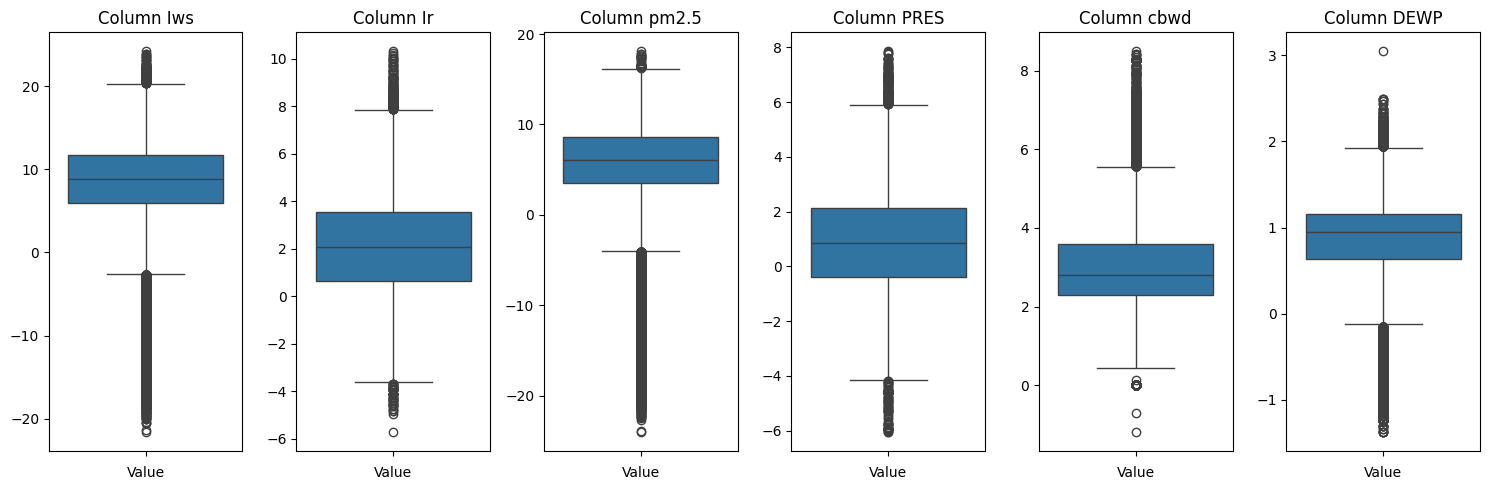

Rows that have outliersr:
          id                 date     Iws     Ir  pm2.5   PRES   cbwd   DEWP  \
25        25  2016-07-01 06:15:00   7.502  3.215  2.239  0.888  5.330  1.980   
28        28  2016-07-01 07:00:00   7.435  3.282  2.310  1.031  5.087  2.224   
29        29  2016-07-01 07:15:00   7.636  3.282  2.274  1.066  5.330  2.071   
151      151  2016-07-02 13:45:00   8.908  4.890  6.219  2.665  2.833  1.949   
193      193  2016-07-03 00:15:00   9.980  5.291  7.889  2.949  2.863  2.071   
...      ...                  ...     ...    ...    ...    ...    ...    ...   
64285  64285  2018-05-01 15:15:00  -5.492 -0.402 -9.239 -2.132  2.833  1.371   
64286  64286  2018-05-01 15:30:00  -2.545 -0.938 -5.259 -2.452  2.772  1.371   
64287  64287  2018-05-01 15:45:00  -4.086 -0.603 -7.107 -1.670  2.559  1.157   
64313  64313  2018-05-01 22:15:00  11.721  1.808  6.823 -0.782  4.752  2.163   
64314  64314  2018-05-01 22:30:00  11.922  1.808  6.432 -1.315  4.752  2.102   

       Temper

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to detect outliers in a column
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Columns that you want to check for outliers
outlier_detection_column = ['Iws',	'Ir',	'pm2.5',	'PRES',	'cbwd',	'DEWP']

# Boxplot Visualization
fig, axes = plt.subplots(nrows=1, ncols=len(outlier_detection_column), figsize=(15, 5))

for i, kolom in enumerate(outlier_detection_column):
    sns.boxplot(y=df_1[kolom], ax=axes[i])
    axes[i].set_title(f'Column {kolom}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Perform analysis to find rows with outliers
outliers_df = pd.DataFrame()

for kolom in outlier_detection_column:
    outliers_df[kolom] = detect_outliers(df_1[kolom])

# Display rows with outliers
rows_with_outliers = outliers_df.any(axis=1)
rows_with_outliers_df = df_1[rows_with_outliers]
print("Rows that have outliersr:")
print(rows_with_outliers_df)


> Judging from the boxplot visualisation and the information above, all variables have outliers.


In [10]:
for kolom in outlier_detection_column:
    Q1 = df_1[kolom].quantile(0.25)
    Q3 = df_1[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_border[kolom] = (lower_bound, upper_bound)

outliers = {}
for kolom in outlier_detection_column:
    lower_bound, upper_bound = column_border[kolom]
    outliers[kolom] = df_1[(df_1[kolom] < lower_bound) | (df_1[kolom] > upper_bound)]

In [11]:
for kolom, (lower_bound, upper_bound) in column_border.items():
    print(f"Column '{kolom}':")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print()

Column 'Iws':
Lower Bound: -2.678999662399292
Upper Bound: 20.36099934577942

Column 'Ir':
Lower Bound: -3.649999886751175
Upper Bound: 7.86999985575676

Column 'pm2.5':
Lower Bound: -4.070000410079956
Upper Bound: 16.25800061225891

Column 'PRES':
Lower Bound: -4.175499960780144
Upper Bound: 5.916499927639961

Column 'cbwd':
Lower Bound: 0.3189996480941779
Upper Bound: 5.559000372886657

Column 'DEWP':
Lower Bound: -0.1354999542236328
Upper Bound: 1.932499885559082



> In this dataset it is not possible to handle outliers because it will reduce the integrity of the dataset and impact the analysis that will be carried out later. Therefore, outliers will be left alone, and will be overcome by choosing to use a model that is robust to outliers.


### Check Imbalance Data

In [12]:
from sklearn.utils import resample
df_1['Temperature'].value_counts()

Temperature
 0.000000     432
 6.753000     351
 10.060000    332
 4.995000     330
 10.130000    324
             ... 
 42.490002      1
 42.348999      1
 46.007000      1
 42.068001      1
-3.728000       1
Name: count, Length: 700, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

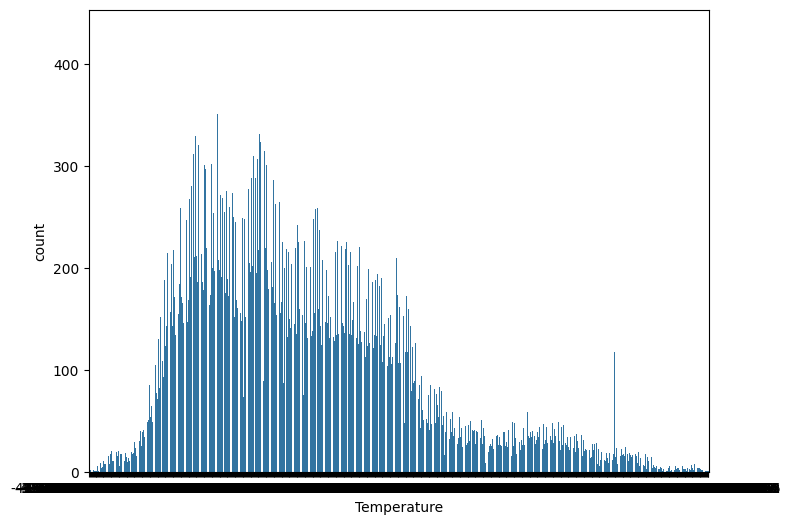

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x = df_1['Temperature'])
plt.show

> It can be seen from the visualisation above, that the imbalance of the target variable is **Temperature**, but handling imbalanced data is not required in this dataset because the target feature of this dataset is continuous data.



### Feature Encoding

> In this dataset, there is no need for feature encoding because the variables in this dataset are already numeric data.

##### **Summary for Data Preparation**

In this process, an explanation is obtained regarding the state of the dataset to be used.

1. This meteorological parameter dataset has 64,320 rows and 9 columns and of the 9 columns, there is a target column, namely the Temperature column. 
2. This dataset does not have missing and duplicate values, so there is no need to handle them. 
3. There are so many outliers, totalling 15,952 rows from 6 columns that the outliers handling process is carried out, namely: **Iws, Ir, pm2.5, PRES, cbwd, DEWP.** Outliers checking is only done on these 6 features and is not applied to ID, Date and Temperature columns. 
4. However, we do not handle outliers, because it can reduce the integrity of the dataset and impact the analysis that will be carried out later. 
5. Handling of imbalanced data is not necessary because the target feature contains continuous data. 
6. There is no need for feature encoding in this dataset because the variables in this dataset are already numeric data. Feature encoding is usually required for variables with categorical data types that need to be converted into numerical representations in order to be understood by machine learning algorithms. Therefore, this dataset does not need feature encoding.

## EXPLORATORY DATA ANALYSIS (EDA)

### Data Descriptions


---
1. **Id**: indicates the sequence number of each row in the dataset. 
2. **Date**: indicates the date, month, year, and time when the dataset was observed. The time in the dataset is every 15 minutes. 
3. **Iws** : "Integrating Wind Speed". It is a measure used to describe the average wind speed over a period of time. IWS reflects the total wind speed experienced at the observation site during the time period prior to the observation. This makes it possible to take into account the impact of wind speed in influencing temperature dynamics and overall atmospheric conditions. 
4. **Ir**: "Intensity of Rainfall" means "Rainfall Intensity" measured at each observation time. It is a measure of how much rainwater falls in a given unit of time at the observation location. Rainfall affects local atmospheric conditions in various ways. For example, rain can cause the air temperature to cool down through water evaporation which can then affect the temperature of the surrounding air. In addition, rain can also affect air temperature patterns and temperature distribution in the region. 
5. **Pm2.5**: refers to "Particulate Matter 2.5", which is the concentration of fine particulate matter with a diameter less than or equal to 2.5 micrometres (µm) in the air. These particles can come from a variety of sources, including motor vehicle pollution, industry, biomass burning, and dust. These fine particles can be inhaled into the lungs and reach the respiratory tract, causing health problems such as lung irritation, respiratory distress and other health issues. Levels of pm2.5 also have an impact on the environment and climate. They can affect the absorption of solar radiation and atmospheric stability by affecting visibility and energy distribution in the atmosphere. 
6. **PRES**: stands for "Pressure". It refers to the atmospheric pressure measurement recorded at each point in time in the dataset. High or low atmospheric pressure can affect wind direction and speed, as well as the movement of air masses. Low atmospheric pressure, for example, is often associated with cloudy, rainy or stormy weather, while high pressure tends to produce sunnier and more stable weather. High or low atmospheric pressure can affect wind direction and speed, as well as the movement of air masses. Low atmospheric pressure, for example, is often associated with cloudy, rainy or stormy weather, while high pressure tends to produce clearer, more stable weather. 
7. **Cbwd**: stands for "Combined Wind Direction". It refers to the combined wind direction measured at the observation site at any given point in time. Wind carries air masses from one place to another, and the properties of those air masses, such as temperature and humidity, can affect the temperature in the region. In addition, wind direction also influences the distribution of heat on the Earth's surface, which can affect localised temperature patterns. 
8. **DEWP**: "Dew Point Temperature" is the temperature at which the air becomes so saturated with water vapour that the water vapour begins to condense into water drops. The closer the actual temperature is to the dew point, the higher the relative humidity. Dew point can also affect human perception of thermal comfort. For example, when the dew point temperature is high, the relative humidity of the air is high, and this can make people feel hotter or stickier even though the actual air temperature is not very high. The higher the dew point temperature, the greater the potential for cloud formation, rain, or other weather conditions related to high humidity. 
9. **Temperature**: Air temperature. This is a parameter that measures how hot or cold the air is in a location at a given time, usually measured in degrees centigrade. Fluctuations in temperature over time reflect seasonal patterns, daily variations, and the influence of various weather phenomena. Seasonal patterns include temperature changes that occur throughout the year, such as summer and winter. Daily variations include temperature changes that occur throughout the day, with temperatures typically higher during the day and lower at night. The influence of weather phenomena such as storms, rain or wind can cause significant temperature fluctuations in the short term.




### Features and Data Type

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           64320 non-null  int64  
 1   date         64320 non-null  object 
 2   Iws          64320 non-null  float64
 3   Ir           64320 non-null  float64
 4   pm2.5        64320 non-null  float64
 5   PRES         64320 non-null  float64
 6   cbwd         64320 non-null  float64
 7   DEWP         64320 non-null  float64
 8   Temperature  64320 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.4+ MB


> These meteorological parameter datasets have the same data type which is numeric consisting of integer, float, and object.

### Mean, Median and Mode

Mean

---



In [15]:
df_1[['Iws','Ir','pm2.5','PRES','cbwd','DEWP','Temperature']].mean(axis=0)

Iws             7.522545
Ir              2.142897
pm2.5           4.478698
PRES            0.820356
cbwd            3.042537
DEWP            0.819362
Temperature    13.610430
dtype: float64

> The mean is the point at which the distribution is in equilibrium. If the data distribution is symmetrical, then the mean is a good measure of the centre as it will reflect the middle value of the data. The mean is sensitive to outliers, so outliers can significantly affect the mean value. Mean is usually used for numeric data types.

> For the output itself, it is found that the average cumulative wind speed is 7.522545 in a certain observation period. Then the rainfall intensity is 2.142897 so the pm2.5 level indicates the air quality is 4.478698 µm. The atmospheric pressure recorded in each time point averaged 0.820356. In addition, the wind direction measured at the observation site showed an average of 3.042537. So the dew point temperature was at an average of 0.819362. So, it was found that the average air temperature was 13.610430°C.



Median

---



In [16]:
df_1[['Iws','Ir','pm2.5','PRES','cbwd','DEWP','Temperature']].median(axis=0)

Iws             8.841
Ir              2.076
pm2.5           6.041
PRES            0.853
cbwd            2.802
DEWP            0.944
Temperature    11.959
dtype: float64

> The median is the midpoint of a distribution where the number of values above the median is the same as below it. The midpoint is the middle value measured from the lowest value to the highest value. The median can also be thought of as the 50th percentile. The median is suitable when the data has a skewed distribution or when there are outliers in the data. Median is suitable for various types of data, especially when you have data that has a skewed distribution.

> For the output itself, it is found that the cumulative wind speed has a midpoint of 8,841 in a given observation period. Then the midpoint of the rainfall intensity is 2,076 so the pm2.5 level shows a median air quality of 6,041 µm. Atmospheric pressure was recorded in each time point with the median being 0.853. In addition, the wind direction measured at the observation site showed a median of 2.802. So the dew point temperature was at a median value of 0.944. So, it was found that the midpoint of the air temperature was 11.959°C.



Mode

---



In [17]:
df_1[['Iws','Ir','pm2.5','PRES','cbwd','DEWP','Temperature']].mode(axis=0)

,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,10.717,0.0,0.0,0.0,2.345,1.097,0.0


> The mode is the value that appears most frequently in a data distribution. The mode may not always give a complete picture of the data distribution, especially if the data has many unique values or a highly asymmetrical distribution. Therefore, the mode is usually used in conjunction with other metrics such as the mean and median to give a more complete picture of the data.

> For the output itself, we found that the mode of cumulative wind speed is 10,717 in a certain observation period. Then the rainfall intensity is 0.0 so the pm2.5 level shows an air quality mode of 0.0 µm. Atmospheric pressure was recorded in each time point with its mode being 0.0. In addition, the wind direction measured at the observation site shows a mode of 2.345. So, the mode of dew point temperature is 1.097. So, it was found that the most frequently occurring air temperature was at 0.0°C.



### Statistical Five Summaries

Statistical five summaries are a set of descriptive statistics used to provide a concise overview of the data distribution. There are 5 statistical features namely:

Minimum: The lowest value in the data set.

First Quartile (Q1) : The value under which 25% of the data falls. It is also known as the lower quartile.

Median (Second Quartile or Q2) : The middle value in a data set. It is the value where 50% of the data falls under it.

Third Quartile (Q3): The value where 75% of the data falls under it. It is also known as the upper quartile.

Maximum: The highest value in the data set.



In [18]:
df_1.describe()

,id,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
count,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000
mean,32159.500000,7.522545,2.142897,4.478698,0.820356,3.042537,0.819362,13.610430
std,18567.728994,6.914888,2.023449,6.669074,1.818778,1.169700,0.602287,8.827735
min,0.000000,-21.568001,-5.693000,-23.986000,-6.041000,-1.188000,-1.371000,-4.221000
25%,16079.750000,5.961000,0.670000,3.553000,-0.391000,2.284000,0.640000,6.753000
50%,32159.500000,8.841000,2.076000,6.041000,0.853000,2.802000,0.944000,11.959000
75%,48239.250000,11.721000,3.550000,8.635000,2.132000,3.594000,1.157000,18.712000
max,64319.000000,24.180000,10.315000,18.087000,7.853000,8.498000,3.046000,46.007000


> Based on the Statistical Five Summaries, some information was found, including: 
1. Value range of the Temperature variable: Temperature has a range from -4.221000°C to 46.007000°C. This means that the dataset covers a wide range of temperatures from sub-zero temperatures to very high temperatures, showing significant temperature variation in the dataset. This shows that the temperature covers a wide range of diverse weather or environmental conditions. 
2. Max of Iws variable: Based on the *Beaufort Scale*, the maximum wind speed shows 24.18 m/s or about 75 km/h on the *Beaufort Scale*. Winds at this level fall into the *strong/severe gale* category and are strong enough to cause minor to moderate damage to building structures, uproot trees, and make outdoor activities difficult. 
3. Max of pm2.5 variable: Based on the guidelines of the World Health Organisation (WHO), the maximum pm2.5 level of 18,087 µg indicates that this value is still below the daily (24-hour) maximum limit of 25 µg/m³. Therefore, this value can be considered favourable when compared to the daily limit set by WHO. This means that at a certain point in time in this dataset, the pm2.5 concentration reached 18,087 µg, which is still below the WHO daily maximum limit. Nonetheless, it is still important to monitor pm2.5 concentrations regularly and ensure that the annual average does not exceed the set guideline (10 µg/m³) to protect public health from long-term exposure to air pollution.



### Data Distribution

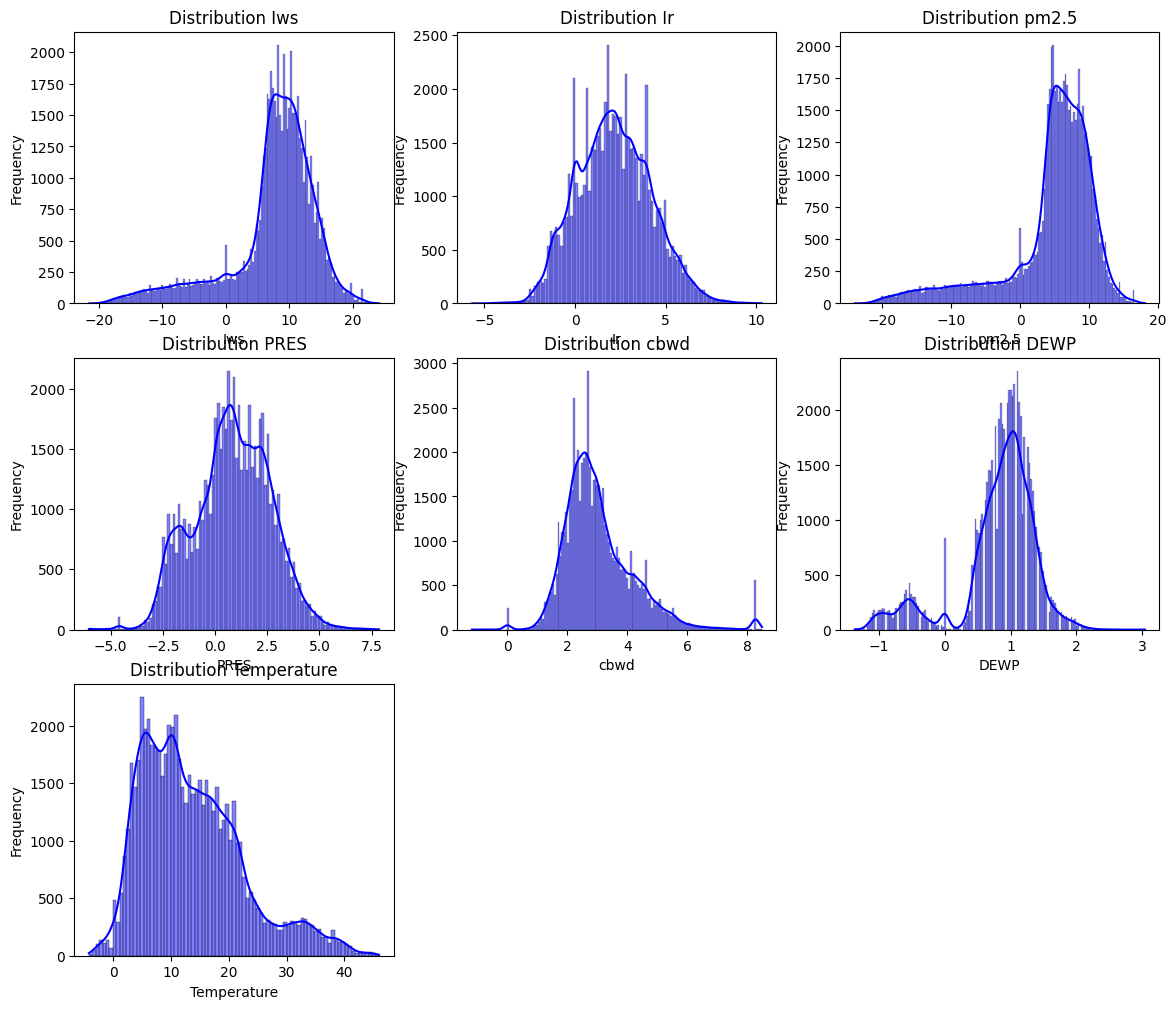

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Iws','Ir','pm2.5','PRES','cbwd','DEWP','Temperature']

num_plots = len(numeric_columns)
num_cols = 3
num_rows = num_plots // num_cols
if num_plots % num_cols:
    num_rows += 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 12))

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.histplot(df_1[column], kde=True, ax=ax, color='blue')
    ax.set_title(f'Distribution {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

for i in range(num_plots, num_rows * num_cols):
    axes.flatten()[i].remove()

plt.show()

> Based on the output above, several conclusions are obtained, namely: 
1. Based on the **Iws** distribution output, the data distribution shows that the Iws data stretches to the left or **left skewed** because the data spreads more around the maximum value as evidenced by the mode value (10.717) > median (8.841) > mean (7.522545) or called **negative skewed**. 
2. Based on the **Ir** distribution output, the data distribution shows that the Ir data is skewed to the right or **right skewed** because the data is more spread around the lower values, with some very high values that pull the distribution towards the right as evidenced by the mean (2.142897) > median (2.076) > mode (0.0) or called **positive skewed**. 
3. Based on the **pm2.5** distribution output, it is found that the pm2.5 data distribution is left skewed or **left skewed** as evidenced by the statistical value of mode (0.0) < median (6.041) which means that the data is more spread around the maximum value or higher value. In this case, the tail of the data distribution tends to be on the left or called **negative skewed**. 
4. Based on the **PRES** distribution output, it is found that the data is skewed to the right or **right skewed** as evidenced by the mode value (0.0) < median (0.853) which means that the data spreads more around the minimum value with some higher values which pulls the distribution towards the right and is called **positive skewed**. 
5. Based on the **cbwd** distribution output, the data distribution shows that the cbwd data is right skewed or **right skewed** because the data is more spread around the minimum value with some higher values that pull the distribution towards the right as evidenced by the value < mode (2.345) < median (2.802) < mean (3.042537) or called **positive skewed**. 
6. Based on the **DEWP** distribution output, the data distribution shows that the DEWP data stretches to the left or **left skewed** because the data spreads more around the maximum value as evidenced by the mode (1.097) > median (0.944) > mean (0.8193622) or called **negative skewed**. 
7. Based on the **Temperature** distribution output, the data distribution shows that the Temperature data stretches to the right or **right skewed** because the data spreads more around the minimum value. This is evidenced by the order of mean (13.610430) > median (11.959) > mode (0.0). This distribution shows that the data is more spread around the lower values, with some very high values pulling the distribution towards the right, and is called **positive skewed**.



**Elaboration**

---



Line Chart of Temperature and Air Quality Maximum Limits (pm2.5) that Can Indirectly Cause Heatwaves

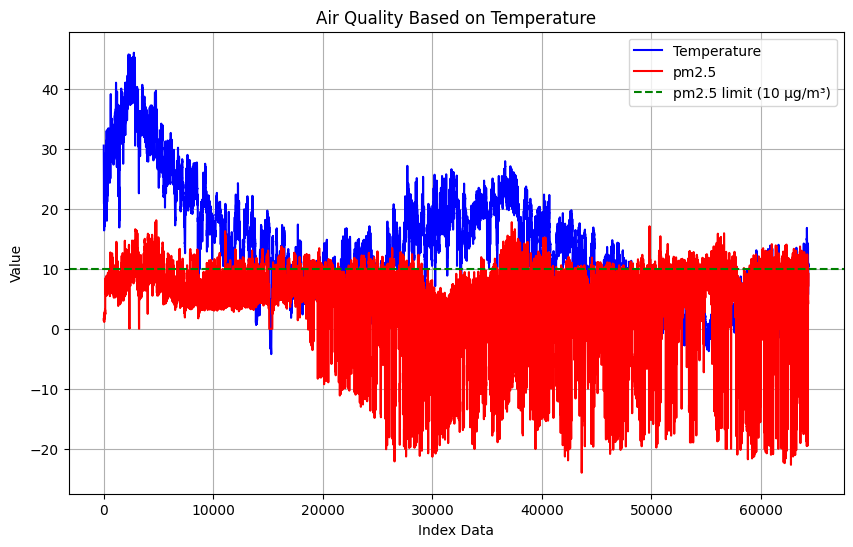

In [20]:
import matplotlib.pyplot as plt

pm25 = df_1['pm2.5']
temperature = df_1['Temperature']

# Average maximum limit for pm2.5 according to WHO
pm25_limit = 10

plt.figure(figsize=(10, 6))
plt.plot(temperature, label='Temperature', color='blue')
plt.plot(pm25, label='pm2.5', color='red')
plt.axhline(y=pm25_limit, color='green', linestyle='--', label='pm2.5 limit (10 µg/m³)')
plt.title('Air Quality Based on Temperature')
plt.xlabel('Index Data')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

> Based on the Line chart above, the output shows that there is a level of pm2.5 that shows air quality above the annual average maximum limit of 10 µg/m³. This shows that air quality exceeding the maximum limit can cause various health problems, including respiratory problems such as asthma, bronchitis, and chronic obstructive pulmonary disease (COPD), and even air pollution. According to the WHO, the maximum annual average limit for pm2.5 (air quality) is 10 µg/m³ so in this data record there is still air quality that can be said to be not good. From the line chart above, it can also be seen that there is a high temperature. So, there is a relationship between temperature and air quality (pm2.5), namely if the temperature is high then the air quality is poor. One of the impacts of poor air quality is air pollution. When both air temperature is high and air pollution levels are high, it can contribute to extreme weather conditions such as heatwaves. The two together can worsen the situation and increase the risk of heatwaves. Heatwaves occur when air temperatures are significantly above average for a sustained period of time. While pm2.5 does not directly cause heatwaves, the link between high air temperatures and poor air quality and air pollution can contribute to global warming and climate change, which in turn can increase the likelihood of heatwaves.



Line Chart of Temperature and Wind Speed (Factors Helping the Spread of Disease During a Heat Wave)

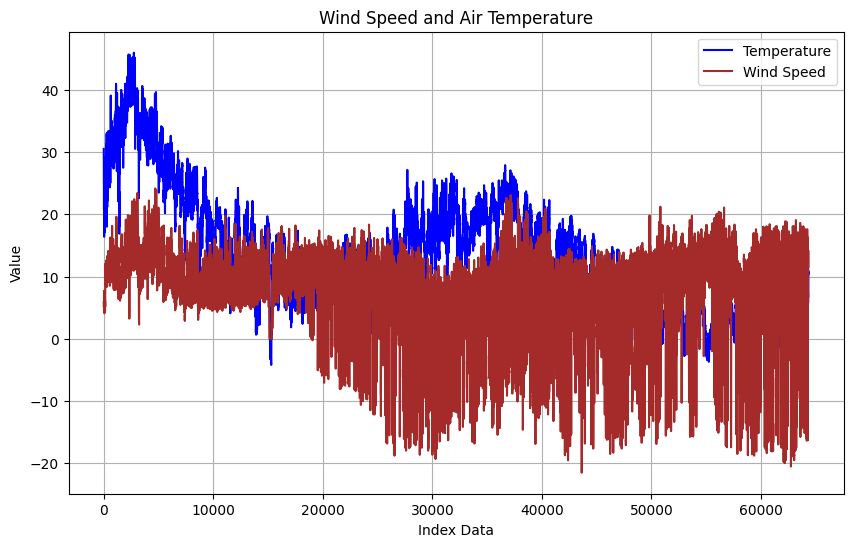

In [21]:
wind = df_1['Iws']
temperature = df_1['Temperature']

plt.figure(figsize=(10, 6))
plt.plot(temperature, label='Temperature', color='blue')
plt.plot(wind, label='Wind Speed', color='brown')
plt.title('Wind Speed and Air Temperature')
plt.xlabel('Index Data')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

High average temperatures can accelerate the breeding cycle of various disease-carrying organisms such as bacteria, viruses, fungi, flies and mosquitoes. Heatwaves also tend to decrease the supply of clean water, which in turn leads to dehydration problems and decreased immunity in the affected communities. Disease seeds will spread more easily when wind speeds reach high levels. This further exacerbates the negative impacts of heatwaves.



## FEATURE ENGINEERING

In the Feature Engineering process, several features and changes to existing features will be added in order to prepare the best dataset before modelling.

### Additions and Changes to Features

#### Convert 'date' column

In [22]:
# Converting 'date' column to datetime format
df_2 = df_1.copy()
df_2['date'] = pd.to_datetime(df_2['date'])

> Convert the 'date' column, which was originally a column with a string value, to a column with a datetime format. This is done because we want to separate the year, month, date, hour and minute to create each feature.

#### Splitting the parts in the 'date' column

In [23]:
# Separate the year, month, date/day, hour, and minute into their respective columns
df_2['year'] = df_2['date'].dt.year
df_2['month'] = df_2['date'].dt.month
df_2['day'] = df_2['date'].dt.day
df_2['hour'] = df_2['date'].dt.hour
df_2['minute'] = df_2['date'].dt.minute

> Splitting datetime data and creating columns for each time unit.

#### Realtive Humidity (RH)

In [24]:
# Calculating relative humidity (RH)
df_2['RH'] = 100 * (
    np.exp((17.625 * df_2['DEWP']) / (243.04 + df_2['DEWP'])) /
    np.exp((17.625 * df_2['Temperature']) / (243.04 + df_2['Temperature']))
)

> Calculating the relative humidity and making it a new feature was done to improve the performance of the model.

#### RH Categorisation

In [25]:
# Create RH category column
def categorize_rh(rh):
    if rh < 30:
        return 1 # Very Dry
    elif 30 <= rh < 50:
        return 2 # Dry
    elif 50 <= rh < 70:
        return 3 # Comportable
    elif 70 <= rh < 90:
        return 4 # Humid
    else:
        return 5 # Very Humid

df_2['RH_Category'] = df_2['RH'].apply(categorize_rh)

> Categorising the air relative humidity is necessary to provide information about the air humidity at that time and at the same time provide advice regarding the environmental conditions. Because in some conditions, air that is classified as very humid or very dry can have a big impact, especially on humans.

Source : [RH category](https://www.osti.gov/biblio/1565082)

#### Calculating AQI

In [26]:
# Calculating AQI (Air Quality Index) based on PM2.5 concentration
def calculate_aqi(pm25):
    if pm25 <= 12:
        return 1 # Good
    elif 12 < pm25 <= 35.4:
        return 2 # Medium
    elif 35.4 < pm25 <= 55.4:
        return 3 # Unhealthy for Certain People
    elif 55.4 < pm25 <= 150.4:
        return 4 # Unhealthy
    elif 150.4 < pm25 <= 250.4:
        return 5 # Very Unhealthy
    else:
        return 6 # Danger

# Apply the function to calculate AQI
df_2['AQI'] = df_2['pm2.5'].apply(calculate_aqi)

In [27]:
# Set the 'date' column as index
df_2.set_index('date', inplace=True)
df_2

,id,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,year,month,day,hour,minute,RH,RH_Category,AQI
date,,,,,,,,,,,,,,,,
2016-07-01 00:00:00,0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2016,7,1,0,0,15.407155,1,1
2016-07-01 00:15:00,1,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2016,7,1,0,15,15.537727,1,1
2016-07-01 00:30:00,2,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2016,7,1,0,30,15.814830,1,1
2016-07-01 00:45:00,3,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2016,7,1,0,45,18.852737,1,1
2016-07-01 01:00:00,4,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2016,7,1,1,0,18.096185,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-01 22:45:00,64315,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000,2018,5,1,22,45,53.350777,3,1
2018-05-01 23:00:00,64316,14.200,1.541,9.310,0.284,4.752,1.249,10.482000,2018,5,1,23,0,52.803017,3,1
2018-05-01 23:15:00,64317,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000,2018,5,1,23,15,53.786359,3,1


### Heatmap Correlation

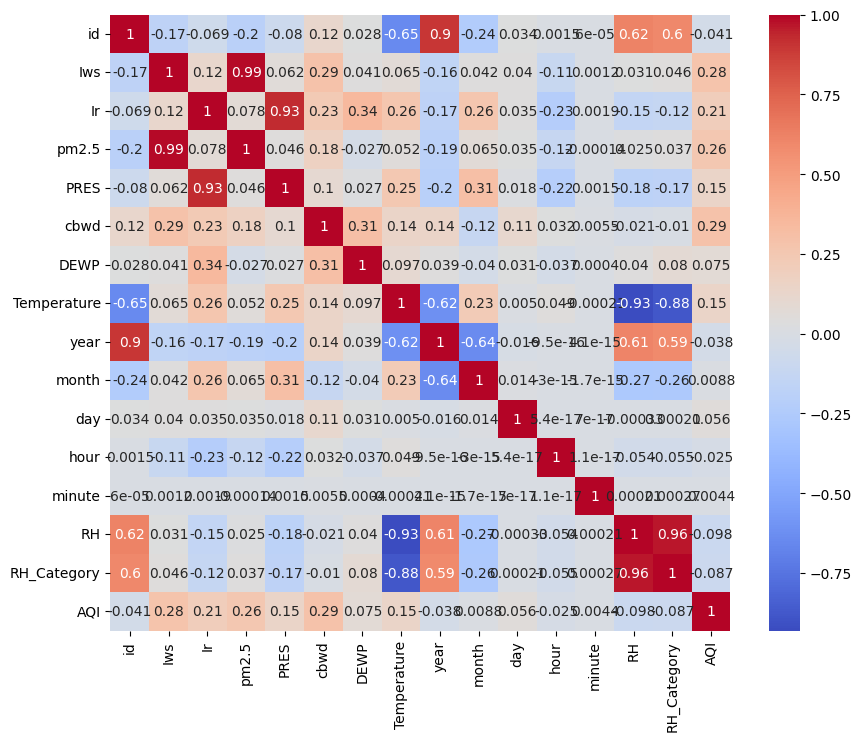

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm')
plt.show()

In [29]:
import pandas as pd
# Calculate the correlation between each feature and the target
correlation_matrix = df_2.corr()
target_correlation = correlation_matrix['Temperature'].drop('Temperature')
threshold = 0.1

# Selecting features whose correlation with the target exceeds the threshold
selected_features = target_correlation[abs(target_correlation) > threshold].index.tolist()
print("Fitur yang terpilih berdasarkan threshold korelasi:", selected_features)

# Dataset with selected features
df_3 = df_2[selected_features + ['Temperature']]
df_3

Fitur yang terpilih berdasarkan threshold korelasi: ['id', 'Ir', 'PRES', 'cbwd', 'year', 'month', 'RH', 'RH_Category', 'AQI']


,id,Ir,PRES,cbwd,year,month,RH,RH_Category,AQI,Temperature
date,,,,,,,,,,
2016-07-01 00:00:00,0,2.009,0.462,4.203,2016,7,15.407155,1,1,30.531000
2016-07-01 00:15:00,1,2.076,0.426,4.264,2016,7,15.537727,1,1,30.459999
2016-07-01 00:30:00,2,1.942,0.391,4.234,2016,7,15.814830,1,1,30.038000
2016-07-01 00:45:00,3,1.942,0.426,4.234,2016,7,18.852737,1,1,27.013000
2016-07-01 01:00:00,4,2.076,0.426,4.142,2016,7,18.096185,1,1,27.787001
...,...,...,...,...,...,...,...,...,...,...
2018-05-01 22:45:00,64315,1.407,-0.746,4.843,2018,5,53.350777,3,1,10.622000
2018-05-01 23:00:00,64316,1.541,0.284,4.752,2018,5,52.803017,3,1,10.482000
2018-05-01 23:15:00,64317,1.474,-0.959,4.569,2018,5,53.786359,3,1,10.271000


In [30]:
# Deleting 'id', 'month' dan 'RH_category' columns
df_4 = df_3.copy()
df_4 = df_4.drop(columns=['id', 'RH_Category','month','year'])
df_4.head()

,Ir,PRES,cbwd,RH,AQI,Temperature
date,,,,,,
2016-07-01 00:00:00,2.009,0.462,4.203,15.407155,1,30.531000
2016-07-01 00:15:00,2.076,0.426,4.264,15.537727,1,30.459999
2016-07-01 00:30:00,1.942,0.391,4.234,15.814830,1,30.038000
2016-07-01 00:45:00,1.942,0.426,4.234,18.852737,1,27.013000
2016-07-01 01:00:00,2.076,0.426,4.142,18.096185,1,27.787001


### Feature Importance

> After conducting correlation analysis using a threshold of 0.15 because the correlation between features is very small, the features that have a strong relationship with the target variable are Ir (0.26), PRES (0.25), year (-0.62), RH (-0.93).

###### **Summary for Feature Engineering**

From the Feature Engineering process, several changes have been made, namely:

1. Conversion of the 'date' column, which was originally a column that had a string value, was converted into a column with a datetime format. Furthermore, columns that are fractions of the date column are created, namely 'year', 'month', 'day', 'hour' and 'minute'. 
2. Added a new column, namely the RH column (Relative Humidity = Relative Humidity) by utilising the dew point temperature (DEWP) and air temperature (Temperature) from the dataset. From the RH column, a new column is also created to categorise the relative humidity, namely the 'RH_Category' column with category 1 meaning that the air is very dry air, to category 5 meaning that the air is very humid air. 
3. 'AQI' (Air Quality Index) column based on PM2.5 concentration. The column is obtained by categorising the PM2.5 column into several categories, starting from category 1 which means that the air quality is good/healthy to category 6 which means that the air quality is dangerous.



# MODEL DEVELOPMENT

## Splitting and Scalling Data

> This division aims to separate the X and y variables. So that later it can continue to be divided into train data and test data 80:20.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

X = df_4.drop(columns=['Temperature'])
y = df_4['Temperature']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Create a DataFrame from the normalised data
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X_normalized.iloc[train_index], X_normalized.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [32]:
X_normalized

,Ir,PRES,cbwd,RH,AQI
0,0.481134,0.468044,0.556576,0.066695,0.0
1,0.485320,0.465453,0.562874,0.067692,0.0
2,0.476949,0.462934,0.559777,0.069807,0.0
3,0.476949,0.465453,0.559777,0.093000,0.0
4,0.485320,0.465453,0.550279,0.087224,0.0
...,...,...,...,...,...
64315,0.443528,0.381100,0.622651,0.356369,0.0
64316,0.451899,0.455232,0.613256,0.352188,0.0
64317,0.447714,0.365769,0.594363,0.359695,0.0
64318,0.451899,0.396430,0.600661,0.359573,0.0


In [33]:
y

date
2016-07-01 00:00:00    30.531000
2016-07-01 00:15:00    30.459999
2016-07-01 00:30:00    30.038000
2016-07-01 00:45:00    27.013000
2016-07-01 01:00:00    27.787001
                         ...    
2018-05-01 22:45:00    10.622000
2018-05-01 23:00:00    10.482000
2018-05-01 23:15:00    10.271000
2018-05-01 23:30:00    10.341000
2018-05-01 23:45:00    10.833000
Name: Temperature, Length: 64320, dtype: float64

In [34]:

X_train

,Ir,PRES,cbwd,RH,AQI
0,0.481134,0.468044,0.556576,0.066695,0.0
1,0.485320,0.465453,0.562874,0.067692,0.0
2,0.476949,0.462934,0.559777,0.069807,0.0
3,0.476949,0.465453,0.559777,0.093000,0.0
4,0.485320,0.465453,0.550279,0.087224,0.0
...,...,...,...,...,...
53595,0.522989,0.557579,0.474809,0.622085,0.0
53596,0.615067,0.598460,0.503200,0.617250,1.0
53597,0.556472,0.570318,0.540884,0.631366,0.0
53598,0.602511,0.590831,0.547181,0.645878,0.0


In [35]:

X_test

,Ir,PRES,cbwd,RH,AQI
53600,0.631809,0.624082,0.534586,0.667608,0.0
53601,0.564843,0.565208,0.559777,0.674442,0.0
53602,0.602511,0.601051,0.518893,0.691394,0.0
53603,0.619253,0.636822,0.509395,0.689651,0.0
53604,0.627624,0.649633,0.493702,0.694182,0.0
...,...,...,...,...,...
64315,0.443528,0.381100,0.622651,0.356369,0.0
64316,0.451899,0.455232,0.613256,0.352188,0.0
64317,0.447714,0.365769,0.594363,0.359695,0.0
64318,0.451899,0.396430,0.600661,0.359573,0.0


> Dividing the dataset into training and testing data with a proportion of 80:20 aims to optimise the data samples in training the model and ensure that the model built can generalise the pattern well to new data and provide reliable results in practice.

## Model Machine Learning

> This meteorological parameter dataset that includes temperature fluctuations is included in the supervised learning problem because this dataset is already equipped with labels or answer columns that indicate the target, namely temperature. In supervised learning, the model is trained using data that already has labels so that the model can learn the relationship between the features (meteorological parameters) and the target (temperature). This problem belongs to regression because the target to be predicted is a continuous value, i.e. temperature. Therefore, since we want to predict heatwave related to temperature, this problem falls into the category of supervised learning regression.



> The machine learning model that will be created aims to predict whether a certain temperature can be categorised as a heatwave.

### GRADIENT BOOSTING REGRESSOR

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
model_1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_1.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
y_pred_model_1 = model_1.predict(X_test)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_model_1)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_model_1)
print(f'Mean Squared Error (MSE): {mse}')

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_model_1)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Calculating R-squared (R²)
r2 = r2_score(y_test, y_pred_model_1)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.27244524466182346
Mean Squared Error (MSE): 0.11641988675690941
Mean Absolute Percentage Error (MAPE): 26070190555616.062
R-squared (R²): 0.9907147116054814


In [38]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

array([ 1.96314348,  2.01876157,  1.6186937 , ..., 10.16887157,
       10.13613638, 10.45519308])

In [39]:
df_GBR = df_4.copy()
df_GBR['Predicted_GBR'] = model_1.predict(X_normalized)

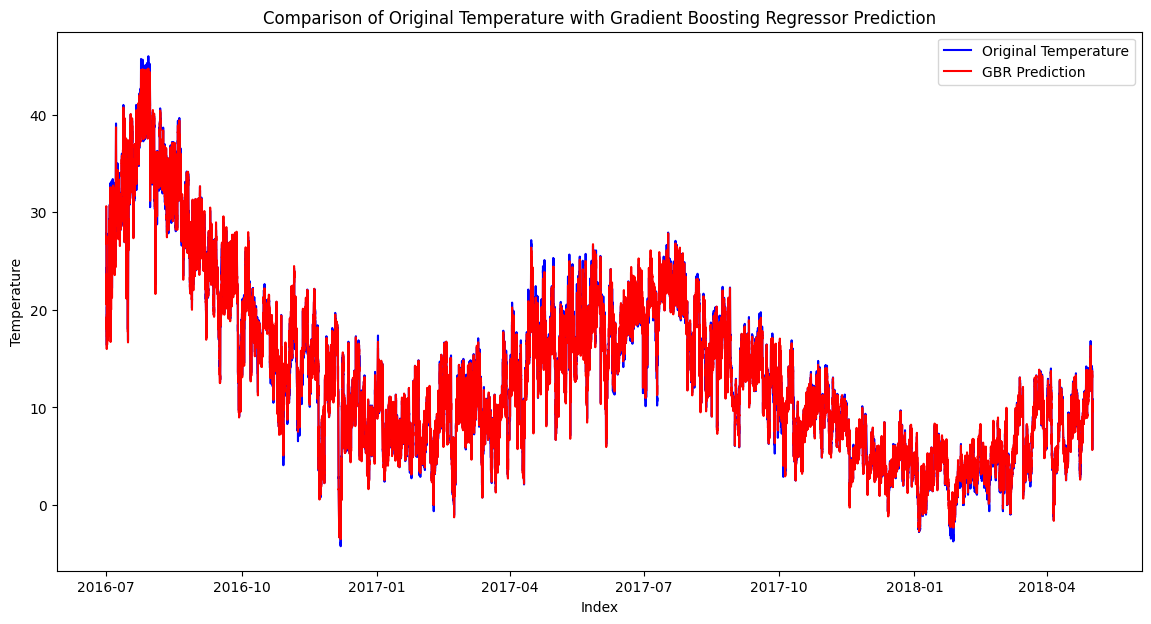

In [40]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with Gradient Boosting Regressor prediction
plt.figure(figsize=(14, 7))
plt.plot(df_GBR['Temperature'], label='Original Temperature', color='blue')
plt.plot(df_GBR['Predicted_GBR'], label='GBR Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with Gradient Boosting Regressor Prediction')
plt.legend()
plt.show()

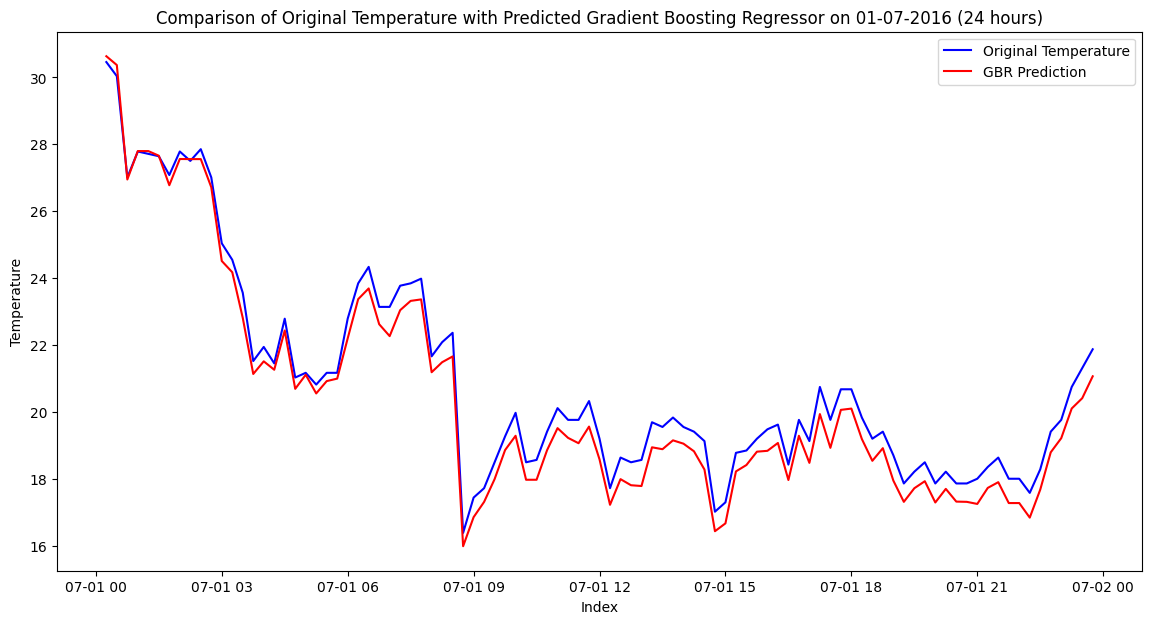

In [41]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with Gradient Boosting Regressor prediction on 01-07-2016 (24 hours)
plt.figure(figsize=(14, 7))
plt.plot(df_GBR['Temperature'].iloc[1:96], label='Original Temperature', color='blue')
plt.plot(df_GBR['Predicted_GBR'].iloc[1:96], label='GBR Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with Predicted Gradient Boosting Regressor on 01-07-2016 (24 hours)')
plt.legend()
plt.show()

---

### RANDOM FOREST

In [42]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
y_pred_model_2 = model_2.predict(X_test)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_model_2)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_model_2)
print(f'Mean Squared Error (MSE): {mse}')

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_model_2)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Calculating R-squared (R²)
r2 = r2_score(y_test, y_pred_model_2)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.25294542825633465
Mean Squared Error (MSE): 0.10234136616211258
Mean Absolute Percentage Error (MAPE): 15984489477901.248
R-squared (R²): 0.9918375706593114


In [44]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

array([ 1.89877   ,  1.82569996,  1.58766001, ..., 10.30718995,
       10.32690996, 10.56815   ])

In [45]:
df_RF = df_4.copy()
df_RF['Predicted_RF'] = model_2.predict(X_normalized)

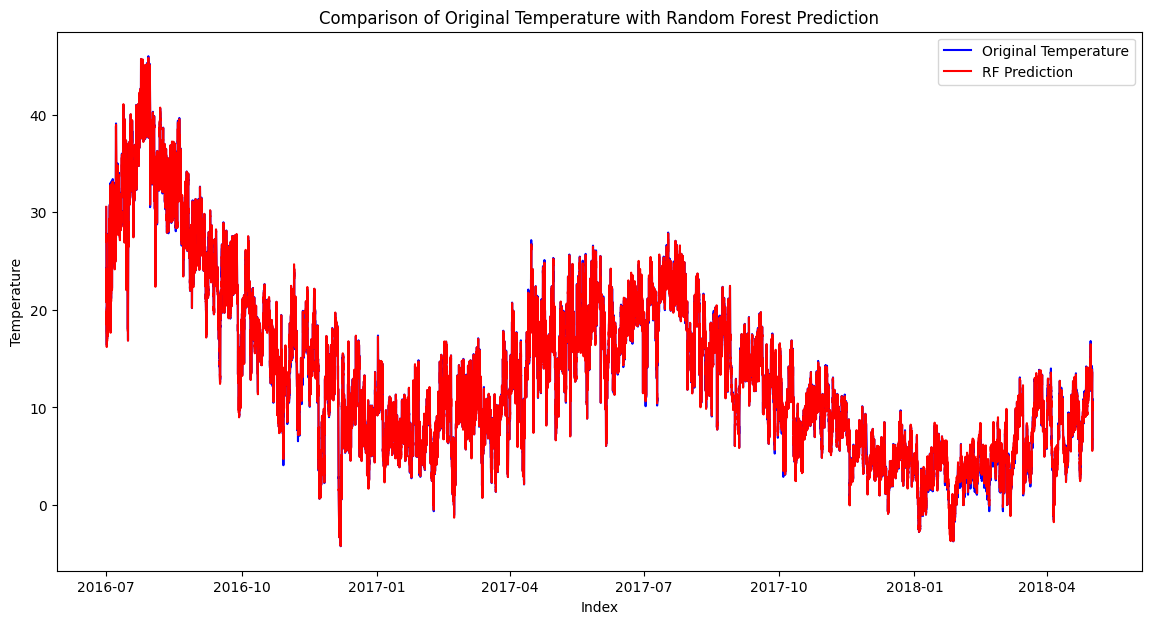

In [46]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with Random Forest prediction
plt.figure(figsize=(14, 7))
plt.plot(df_RF['Temperature'], label='Original Temperature', color='blue')
plt.plot(df_RF['Predicted_RF'], label='RF Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with Random Forest Prediction')
plt.legend()
plt.show()

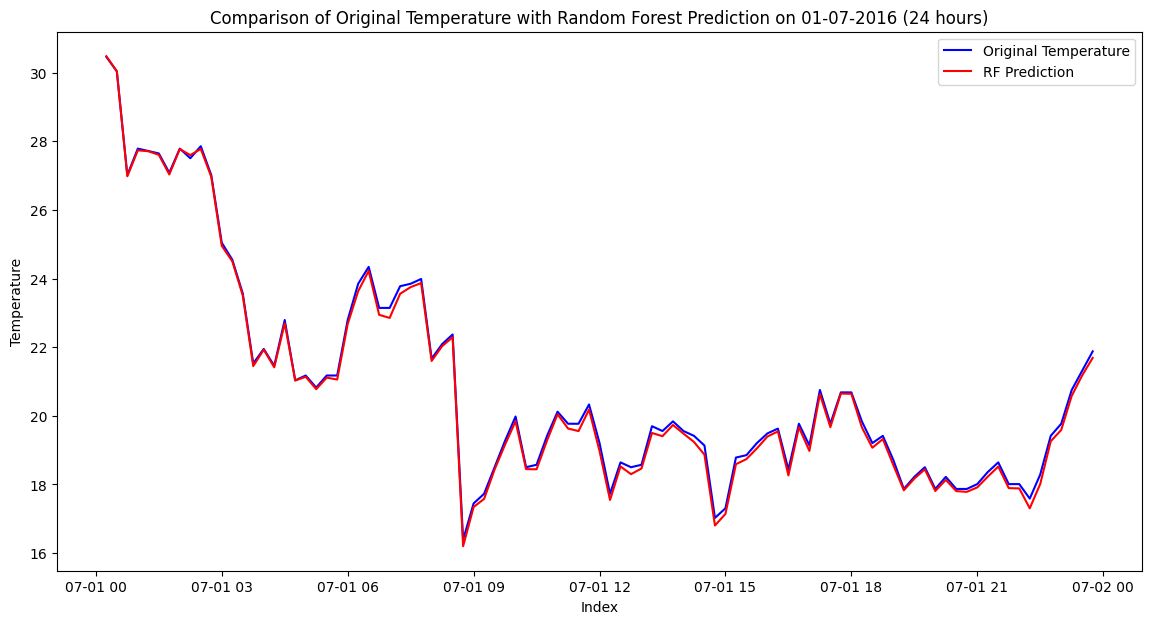

In [47]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with Random Forest prediction on 01-07-2016 (24 hours)
plt.figure(figsize=(14, 7))
plt.plot(df_RF['Temperature'].iloc[1:96], label='Original Temperature', color='blue')
plt.plot(df_RF['Predicted_RF'].iloc[1:96], label='RF Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with Random Forest Prediction on 01-07-2016 (24 hours)')
plt.legend()
plt.show()



---



### LGBM

In [48]:
import lightgbm as lgb
params = {'force_col_wise': True,}
model_3 = lgb.LGBMRegressor(**params)
model_3.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 53600, number of used features: 5
[LightGBM] [Info] Start training from score 15.199442


LGBMRegressor(force_col_wise=True)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
y_pred_model_3 = model_3.predict(X_test)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_model_3)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_model_3)
print(f'Mean Squared Error (MSE): {mse}')

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_model_3)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Calculating R-squared (R²)
r2 = r2_score(y_test, y_pred_model_3)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.2615086611022638
Mean Squared Error (MSE): 0.11140120057366265
Mean Absolute Percentage Error (MAPE): 34517594624996.08
R-squared (R²): 0.9911149864199582


In [50]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

array([ 1.92255164,  1.86508662,  1.32814549, ..., 10.31262345,
       10.30308141, 10.71955257])

In [51]:
df_LGBM = df_4.copy()
df_LGBM['Predicted_LGBM'] = model_3.predict(X_normalized)

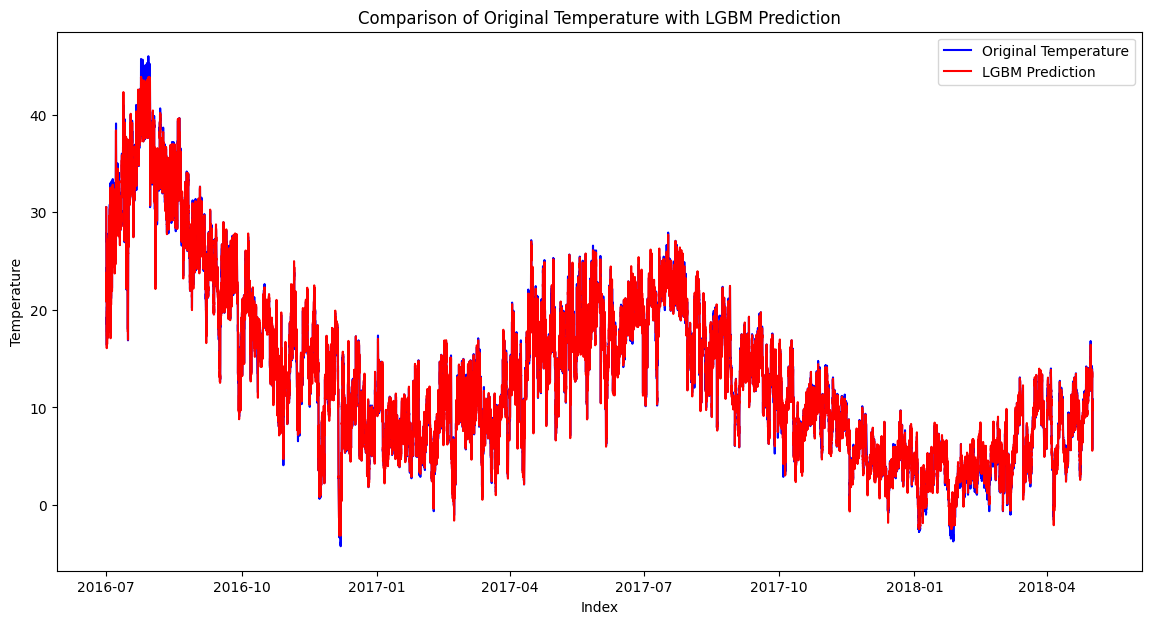

In [52]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with LGBM prediction
plt.figure(figsize=(14, 7))
plt.plot(df_LGBM['Temperature'], label='Original Temperature', color='blue')
plt.plot(df_LGBM['Predicted_LGBM'], label='LGBM Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with LGBM Prediction')
plt.legend()
plt.show()

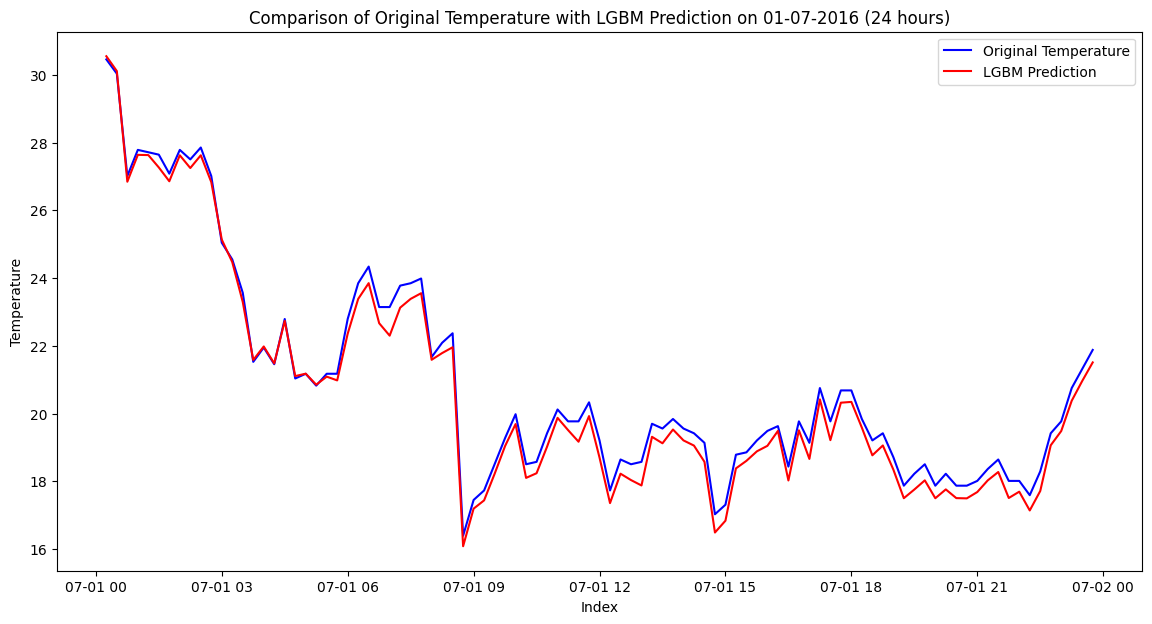

In [53]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with LGBM prediction on 01-07-2016 (24 hours)
plt.figure(figsize=(14, 7))
plt.plot(df_LGBM['Temperature'].iloc[1:96], label='Original Temperature', color='blue')
plt.plot(df_LGBM['Predicted_LGBM'].iloc[1:96], label='LGBM Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with LGBM Prediction on 01-07-2016 (24 hours)')
plt.legend()
plt.show()

---

### XGBOOST

In [54]:
import xgboost as xgb
model_4 = xgb.XGBRegressor()
model_4.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
y_pred_model_4 = model_4.predict(X_test)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_model_4)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_model_4)
print(f'Mean Squared Error (MSE): {mse}')

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_model_4)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Calculating R-squared (R²)
r2 = r2_score(y_test, y_pred_model_4)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.2544363277263196
Mean Squared Error (MSE): 0.11077877025682717
Mean Absolute Percentage Error (MAPE): 27096413608932.562
R-squared (R²): 0.9911646295278352


In [56]:
y_pred_4 = model_4.predict(X_test)
y_pred_4

array([ 2.0511174,  2.0678356,  1.432765 , ..., 10.411782 , 10.45098  ,
       10.825989 ], dtype=float32)

In [57]:
df_XGB = df_4.copy()
df_XGB['Predicted_XGB'] = model_4.predict(X_normalized)

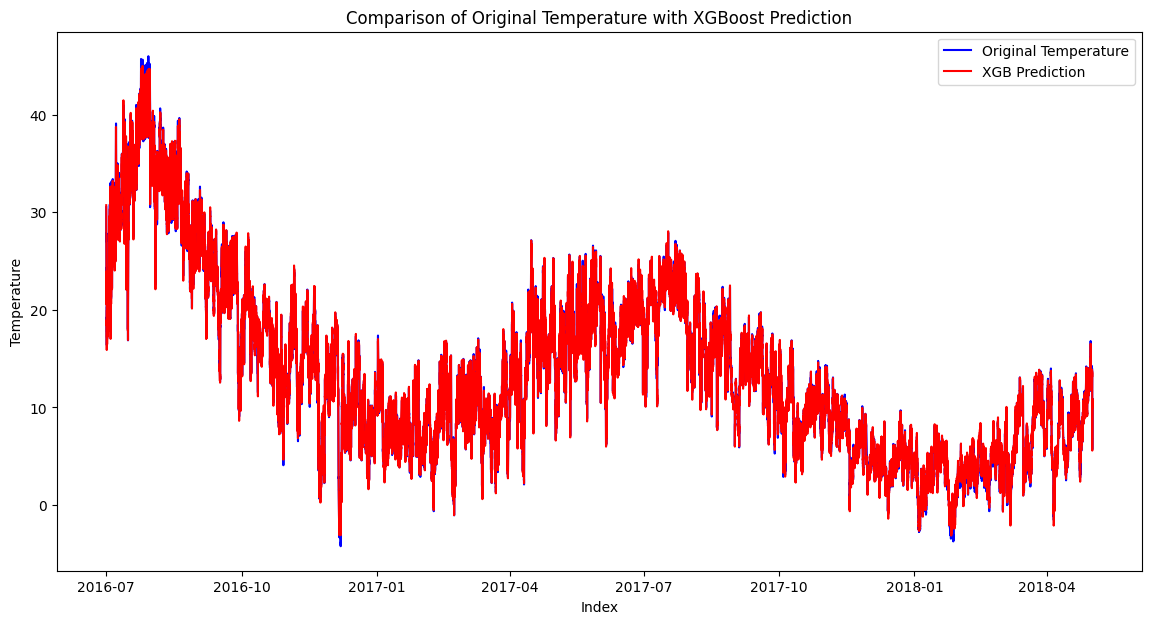

In [58]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with XGBoost prediction
plt.figure(figsize=(14, 7))
plt.plot(df_XGB['Temperature'], label='Original Temperature', color='blue')
plt.plot(df_XGB['Predicted_XGB'], label='XGB Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with XGBoost Prediction')
plt.legend()
plt.show()

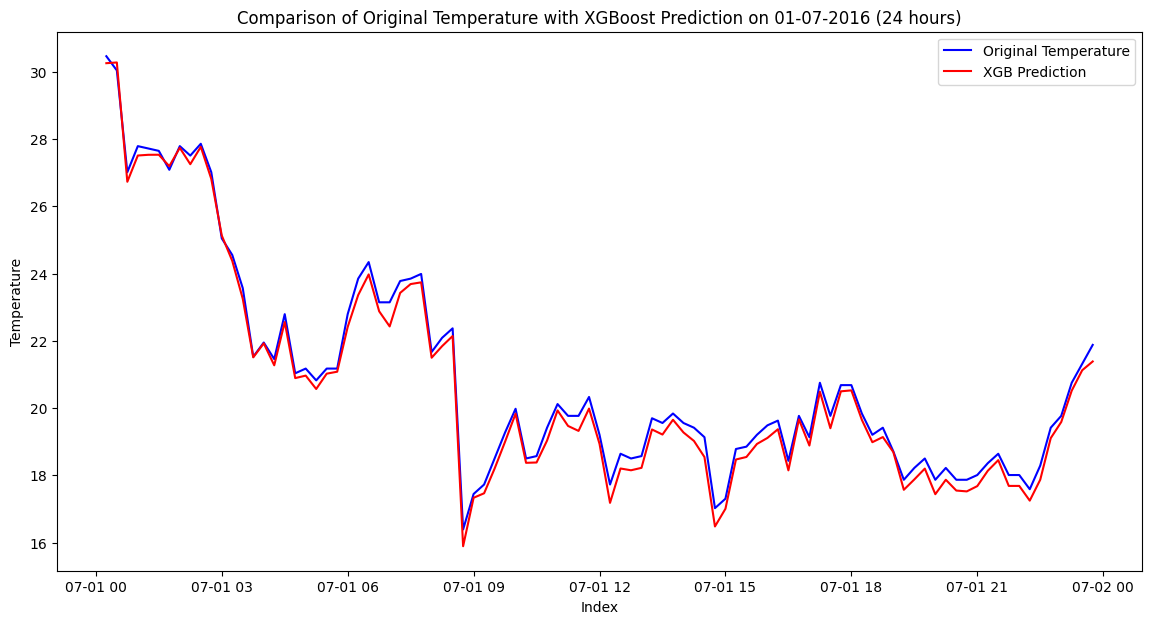

In [59]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with XGBoost prediction on 01-07-2016 (24 hours)
plt.figure(figsize=(14, 7))
plt.plot(df_XGB['Temperature'].iloc[1:96], label='Original Temperature', color='blue')
plt.plot(df_XGB['Predicted_XGB'].iloc[1:96], label='XGB Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with XGBoost Prediction on 01-07-2016 (24 hours)')
plt.legend()
plt.show()

---

### LASSO REGRESSION

In [60]:
from sklearn.linear_model import Lasso
model_5= Lasso(alpha=0.1)
model_5.fit(X_train, y_train)

Lasso(alpha=0.1)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
y_pred_model_5 = model_5.predict(X_test)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_model_5)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_model_5)
print(f'Mean Squared Error (MSE): {mse}')

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_model_5)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Calculating R-squared (R²)
r2 = r2_score(y_test, y_pred_model_5)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 1.7285003665441798
Mean Squared Error (MSE): 5.77856097710787
Mean Absolute Percentage Error (MAPE): 499231977178573.44
R-squared (R²): 0.5391199332654117


In [62]:
y_pred_5 = model_5.predict(X_test)
y_pred_5

array([-1.16082305, -1.66355548, -2.35111943, ..., 11.950181  ,
       11.98180133, 12.50543796])

In [63]:
df_Lasso = df_4.copy()
df_Lasso['Predicted_Lasso'] = model_5.predict(X_normalized)

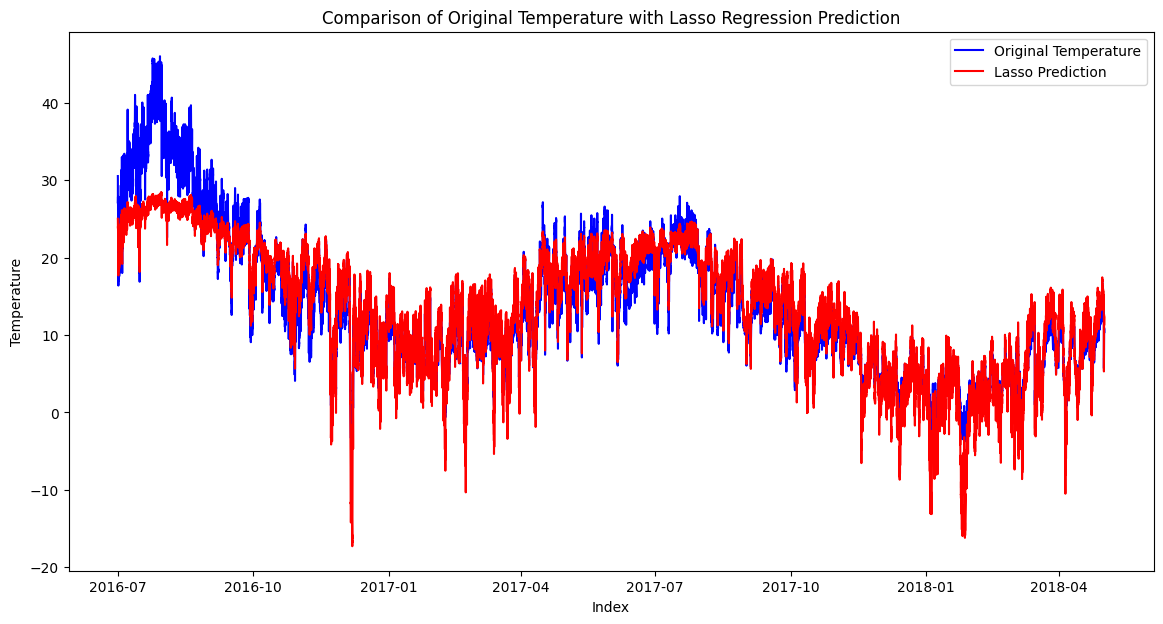

In [64]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with Lasso Regression prediction
plt.figure(figsize=(14, 7))
plt.plot(df_Lasso['Temperature'], label='Original Temperature', color='blue')
plt.plot(df_Lasso['Predicted_Lasso'], label='Lasso Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with Lasso Regression Prediction')
plt.legend()
plt.show()

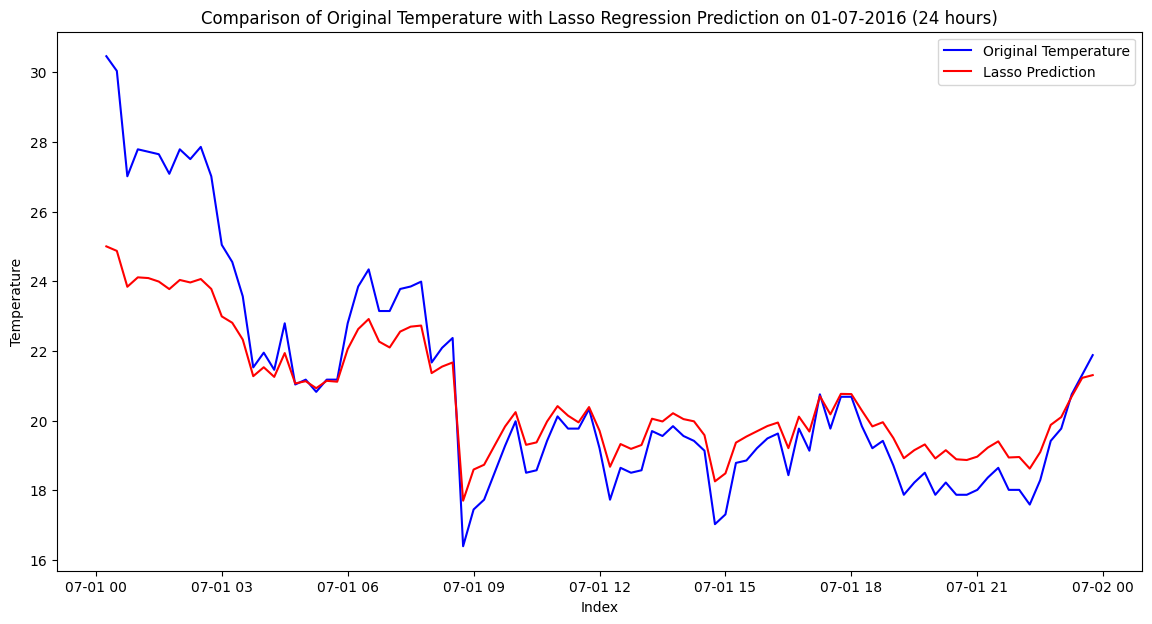

In [65]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with Lasso Regression prediction on 01-07-2016 (24 hours)
plt.figure(figsize=(14, 7))
plt.plot(df_Lasso['Temperature'].iloc[1:96], label='Original Temperature', color='blue')
plt.plot(df_Lasso['Predicted_Lasso'].iloc[1:96], label='Lasso Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with Lasso Regression Prediction on 01-07-2016 (24 hours)')
plt.legend()
plt.show()

### RIDGE REGRESSION

In [66]:
from sklearn.linear_model import Ridge
model_6 = Ridge(alpha=1.0)
model_6.fit(X_train, y_train)

Ridge()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
y_pred_model_6 = model_6.predict(X_test)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_model_6)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_model_6)
print(f'Mean Squared Error (MSE): {mse}')

# Calculating Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_model_6)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# Calculating R-squared (R²)
r2 = r2_score(y_test, y_pred_model_6)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 2.298878350271446
Mean Squared Error (MSE): 9.380698164128024
Mean Absolute Percentage Error (MAPE): 601367929937647.1
R-squared (R²): 0.2518246648209336


In [68]:
y_pred_6 = model_6.predict(X_test)
y_pred_6

array([-1.29842262, -2.13035914, -2.82791243, ..., 13.54502593,
       13.16668189, 12.76801185])

In [69]:
df_Ridge = df_4.copy()
df_Ridge['Predicted_Ridge'] = model_6.predict(X_normalized)

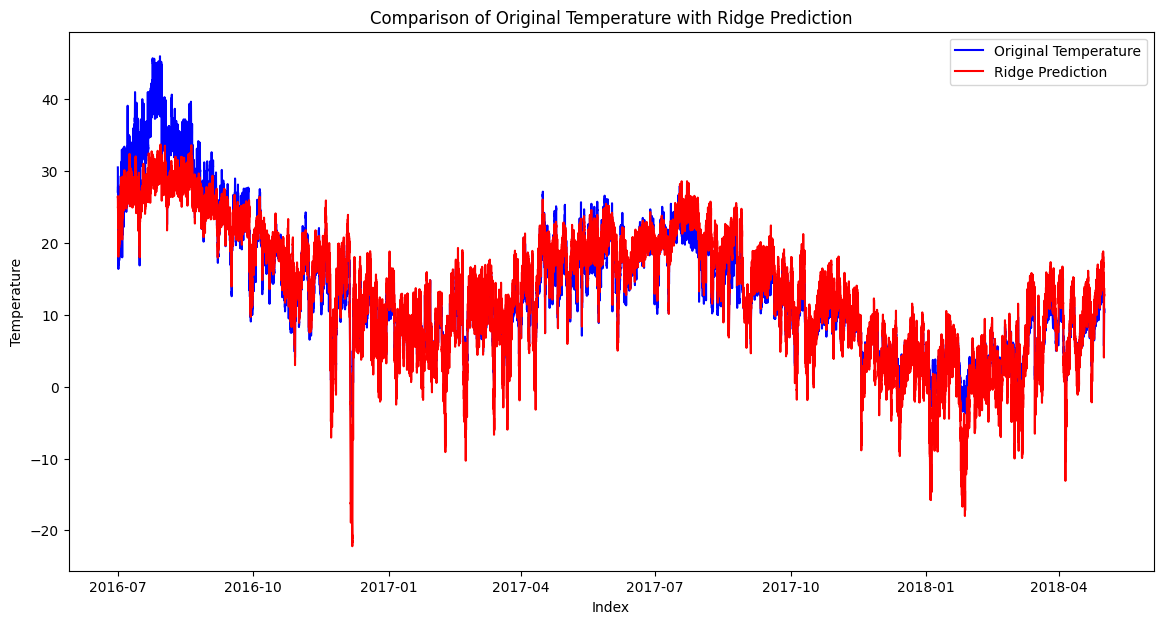

In [70]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with XGBoost prediction
plt.figure(figsize=(14, 7))
plt.plot(df_Ridge['Temperature'], label='Original Temperature', color='blue')
plt.plot(df_Ridge['Predicted_Ridge'], label='Ridge Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with Ridge Prediction')
plt.legend()
plt.show()

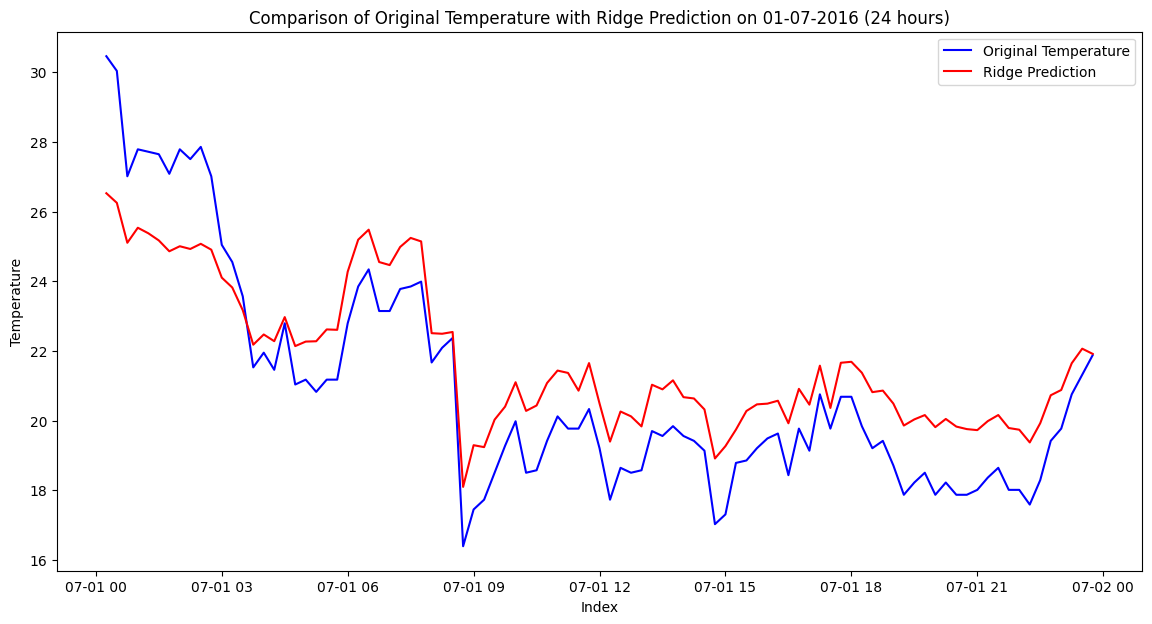

In [71]:
import matplotlib.pyplot as plt

# Comparison plot of original temperature with Ridge prediction on 01-07-2016 (24 hours)
plt.figure(figsize=(14, 7))
plt.plot(df_Ridge['Temperature'].iloc[1:96], label='Original Temperature', color='blue')
plt.plot(df_Ridge['Predicted_Ridge'].iloc[1:96], label='Ridge Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Comparison of Original Temperature with Ridge Prediction on 01-07-2016 (24 hours)')
plt.legend()
plt.show()

---

# CROSS VALIDATION

> **GRADIENT BOOSTING REGRESSOR**

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Cross-validation with 5 folds
cv = 5

# Metric as scorers
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Cross-validation for MAE
cv_scores_mae_1 = cross_val_score(model_1, X_normalized, y, cv=cv, scoring=mae_scorer)
cv_scores_mae_1 = -cv_scores_mae_1

# Cross-validation for MAPE
cv_scores_mape_1 = cross_val_score(model_1, X_normalized, y, cv=cv, scoring=mape_scorer)
cv_scores_mape_1 = -cv_scores_mape_1

# Cross-validation for MSE
cv_scores_mse_1 = cross_val_score(model_1, X_normalized, y, cv=cv, scoring=mse_scorer)
cv_scores_mse_1 = -cv_scores_mse_1

# Cross-validation for R²
cv_scores_r2_1 = cross_val_score(model_1, X_normalized, y, cv=cv, scoring=r2_scorer)

def print_statistics(scores, metric_name):
    print(f"{metric_name} for every fold: {scores}")
    print(f"Average {metric_name}: {np.mean(scores)}")
    print(f"Standard Deviation {metric_name}: {np.std(scores)}")
    print("-" * 30)

print_statistics(cv_scores_mae_1, "MAE")
print_statistics(cv_scores_mape_1, "MAPE")
print_statistics(cv_scores_mse_1, "MSE")
print_statistics(cv_scores_r2_1, "R²")

MAE for every fold: [3.55074604 0.23250224 0.47719927 0.30635943 0.32455957]
Average MAE: 0.9782733094964344
Standard Deviation MAE: 1.2886951216297446
------------------------------
MAPE for every fold: [1.12296608e-01 7.61831098e+12 2.66081695e-02 2.05646371e+12
 6.52094877e+13]
Average MAPE: 14976852470768.604
Standard Deviation MAPE: 25270593333696.742
------------------------------
MSE for every fold: [30.16680481  0.0920403   0.3861051   0.18443182  0.18149841]
Average MSE: 6.202176090587937
Standard Deviation MSE: 11.9827015040219
------------------------------
R² for every fold: [0.57533073 0.99426436 0.97724164 0.99137582 0.98498781]
Average R²: 0.9046400713093796
Standard Deviation R²: 0.1647586065171568
------------------------------


> **RANDOM FOREST**

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Cross-validation with 5 folds
cv = 5

# Metric as scorers
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Cross-validation for MAE
cv_scores_mae_2 = cross_val_score(model_2, X_normalized, y, cv=cv, scoring=mae_scorer)
cv_scores_mae_2 = -cv_scores_mae_2

# Cross-validation for MAPE
cv_scores_mape_2 = cross_val_score(model_2, X_normalized, y, cv=cv, scoring=mape_scorer)
cv_scores_mape_2 = -cv_scores_mape_2

# Cross-validation for MSE
cv_scores_mse_2 = cross_val_score(model_2, X_normalized, y, cv=cv, scoring=mse_scorer)
cv_scores_mse_2 = -cv_scores_mse_2

# Cross-validation for R²
cv_scores_r2_2 = cross_val_score(model_2, X_normalized, y, cv=cv, scoring=r2_scorer)

def print_statistics(scores, metric_name):
    print(f"{metric_name} for every fold: {scores}")
    print(f"Average {metric_name}: {np.mean(scores)}")
    print(f"Standard Deviation {metric_name}: {np.std(scores)}")
    print("-" * 30)

print_statistics(cv_scores_mae_2, "MAE")
print_statistics(cv_scores_mape_2, "MAPE")
print_statistics(cv_scores_mse_2, "MSE")
print_statistics(cv_scores_r2_2, "R²")


MAE for every fold: [3.37187683 0.23341339 0.43657913 0.30230751 0.27660739]
Average MAE: 0.924156850526012
Standard Deviation MAE: 1.2257412904852047
------------------------------
MAPE for every fold: [1.06427096e-01 7.01487813e+12 2.38352677e-02 9.03121589e+11
 2.19288649e+13]
Average MAPE: 5969372927314.783
Standard Deviation MAPE: 8399192753483.699
------------------------------
MSE for every fold: [27.56695516  0.0972134   0.45074651  0.19547421  0.12153257]
Average MSE: 5.686384369737643
Standard Deviation MSE: 10.941003464377012
------------------------------
R² for every fold: [0.611912   0.99387174 0.97286616 0.99083568 0.98984314]
Average R²: 0.9118657433182648
Standard Deviation R²: 0.15015659082230665
------------------------------


> **LGBM**

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Cross-validation with 5 folds
cv = 5

# Metric as scorers
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Cross-validation for MAE
cv_scores_mae_3 = cross_val_score(model_3, X_normalized, y, cv=cv, scoring=mae_scorer)
cv_scores_mae_3 = -cv_scores_mae_3

# Cross-validation for MAPE
cv_scores_mape_3 = cross_val_score(model_3, X_normalized, y, cv=cv, scoring=mape_scorer)
cv_scores_mape_3 = -cv_scores_mape_3

# Cross-validation for MSE
cv_scores_mse_3 = cross_val_score(model_3, X_normalized, y, cv=cv, scoring=mse_scorer)
cv_scores_mse_3 = -cv_scores_mse_3

# Cross-validation for R²
cv_scores_r2_3 = cross_val_score(model_3, X_normalized, y, cv=cv, scoring=r2_scorer)

def print_statistics(scores, metric_name):
    print(f"{metric_name} for every fold: {scores}")
    print(f"Average {metric_name}: {np.mean(scores)}")
    print(f"Standard Deviation {metric_name}: {np.std(scores)}")
    print("-" * 30)

print_statistics(cv_scores_mae_3, "MAE")
print_statistics(cv_scores_mape_3, "MAPE")
print_statistics(cv_scores_mse_3, "MSE")
print_statistics(cv_scores_r2_3, "R²")


[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 51456, number of used features: 5
[LightGBM] [Info] Start training from score 10.679839
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 51456, number of used features: 5
[LightGBM] [Info] Start training from score 14.671278
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 51456, number of used features: 5
[LightGBM] [Info] Start training from score 12.582053
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 51456, number of used features: 5
[LightGBM] [Info] Start training from score 14.432485
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 51456, number of used features: 5
[LightGBM] [Info] Start training from score 15.686497
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 51456, number 

> **XGBOOST**

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Cross-validation with 5 folds
cv = 5

# Metric as scorers
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Cross-validation for MAE
cv_scores_mae_4 = cross_val_score(model_4, X_normalized, y, cv=cv, scoring=mae_scorer)
cv_scores_mae_4 = -cv_scores_mae_4

# cross-validation for MAPE
cv_scores_mape_4 = cross_val_score(model_4, X_normalized, y, cv=cv, scoring=mape_scorer)
cv_scores_mape_4 = -cv_scores_mape_4

# Cross-validation for MSE
cv_scores_mse_4 = cross_val_score(model_4, X_normalized, y, cv=cv, scoring=mse_scorer)
cv_scores_mse_4 = -cv_scores_mse_4

# Cross-validation for R²
cv_scores_r2_4 = cross_val_score(model_4, X_normalized, y, cv=cv, scoring=r2_scorer)

def print_statistics(scores, metric_name):
    print(f"{metric_name} for every fold: {scores}")
    print(f"Average {metric_name}: {np.mean(scores)}")
    print(f"Standard Deviation {metric_name}: {np.std(scores)}")
    print("-" * 30)

print_statistics(cv_scores_mae_4, "MAE")
print_statistics(cv_scores_mape_4, "MAPE")
print_statistics(cv_scores_mse_4, "MSE")
print_statistics(cv_scores_r2_4, "R²")


MAE for every fold: [3.61841829 0.22814819 0.331097   0.25419493 0.33597721]
Average MAE: 0.9535671255675195
Standard Deviation MAE: 1.3330920587926103
------------------------------
MAPE for every fold: [1.10344071e-01 5.48638292e+12 1.84637697e-02 2.43612017e+12
 5.29196575e+13]
Average MAPE: 12168432122828.1
Standard Deviation MAPE: 20475211989814.406
------------------------------
MSE for every fold: [32.87393304  0.08789999  0.2303534   0.11621367  0.31075857]
Average MSE: 6.7238317351415
Standard Deviation MSE: 13.075295582017231
------------------------------
R² for every fold: [0.53722148 0.99452237 0.98642218 0.99456575 0.97429637]
Average R²: 0.8974056327222849
Standard Deviation R²: 0.18024455756718288
------------------------------


> **LASSO REGRESSION**

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Cross-validation with 5 folds
cv = 5

# Metric as scorers
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Cross-validation for MAE
cv_scores_mae_5 = cross_val_score(model_5, X_normalized, y, cv=cv, scoring=mae_scorer)
cv_scores_mae_5 = -cv_scores_mae_5

# Cross-validation for MAPE
cv_scores_mape_5 = cross_val_score(model_5, X_normalized, y, cv=cv, scoring=mape_scorer)
cv_scores_mape_5 = -cv_scores_mape_5

# Cross-validation for MSE
cv_scores_mse_5 = cross_val_score(model_5, X_normalized, y, cv=cv, scoring=mse_scorer)
cv_scores_mse_5 = -cv_scores_mse_5

# Cross-validation for R²
cv_scores_r2_5 = cross_val_score(model_5, X_normalized, y, cv=cv, scoring=r2_scorer)

def print_statistics(scores, metric_name):
    print(f"{metric_name} for every fold: {scores}")
    print(f"Average {metric_name}: {np.mean(scores)}")
    print(f"Standard Deviation {metric_name}: {np.std(scores)}")
    print("-" * 30)

print_statistics(cv_scores_mae_5, "MAE")
print_statistics(cv_scores_mape_5, "MAPE")
print_statistics(cv_scores_mse_5, "MSE")
print_statistics(cv_scores_r2_5, "R²")

MAE for every fold: [7.1162931  1.77392236 1.52215604 1.78719953 2.12178599]
Average MAE: 2.864271404419861
Standard Deviation MAE: 2.1345346833760845
------------------------------
MAPE for every fold: [2.44049624e-01 7.24266750e+13 9.77284974e-02 5.81133889e+13
 8.17580206e+14]
Average MAPE: 189624053913475.94
Standard Deviation MAPE: 315364478937033.1
------------------------------
MSE for every fold: [80.03082671  4.16232658  3.01490881  4.00218734  9.20271394]
Average MSE: 20.0825926756253
Standard Deviation MSE: 30.0516311261029
------------------------------
R² for every fold: [-0.12662355  0.74061811  0.82229092  0.81285441  0.23882026]
Average R²: 0.4975920319974265
Standard Deviation R²: 0.37960224866859127
------------------------------


> **RIDGE REGRESSION**

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Cross-validation with 5 folds
cv = 5

# Metric as scorers
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Cross-validation for MAE
cv_scores_mae_5 = cross_val_score(model_6, X_normalized, y, cv=cv, scoring=mae_scorer)
cv_scores_mae_5 = -cv_scores_mae_5

# Cross-validation for MAPE
cv_scores_mape_5 = cross_val_score(model_6, X_normalized, y, cv=cv, scoring=mape_scorer)
cv_scores_mape_5 = -cv_scores_mape_5

# Cross-validation for MSE
cv_scores_mse_5 = cross_val_score(model_6, X_normalized, y, cv=cv, scoring=mse_scorer)
cv_scores_mse_5 = -cv_scores_mse_5

# Cross-validation for R²
cv_scores_r2_5 = cross_val_score(model_6, X_normalized, y, cv=cv, scoring=r2_scorer)

def print_statistics(scores, metric_name):
    print(f"{metric_name} for every fold: {scores}")
    print(f"Average {metric_name}: {np.mean(scores)}")
    print(f"Standard Deviation {metric_name}: {np.std(scores)}")
    print("-" * 30)

print_statistics(cv_scores_mae_5, "MAE")
print_statistics(cv_scores_mape_5, "MAPE")
print_statistics(cv_scores_mse_5, "MSE")
print_statistics(cv_scores_r2_5, "R²")

MAE for every fold: [6.0565798  1.61408478 1.65102003 1.83786318 2.82416576]
Average MAE: 2.7967427094958177
Standard Deviation MAE: 1.6886740390423916
------------------------------
MAPE for every fold: [2.09264150e-01 1.28579544e+14 1.02151945e-01 5.80722859e+13
 9.92540650e+14]
Average MAPE: 235838495909404.2
Standard Deviation MAPE: 381298583951498.06
------------------------------
MSE for every fold: [59.363314    5.02005182  4.47192111  4.7990006  14.655589  ]
Average MSE: 17.66197530577127
Standard Deviation MSE: 21.20043341335658
------------------------------
R² for every fold: [ 0.16432067  0.68716763  0.73640961  0.77559477 -0.21220082]
Average R²: 0.43025837088269175
Standard Deviation R²: 0.3905034809559166
------------------------------


# LEARNING CURVES

> **GRADIENT BOOSTING REGRESSOR**

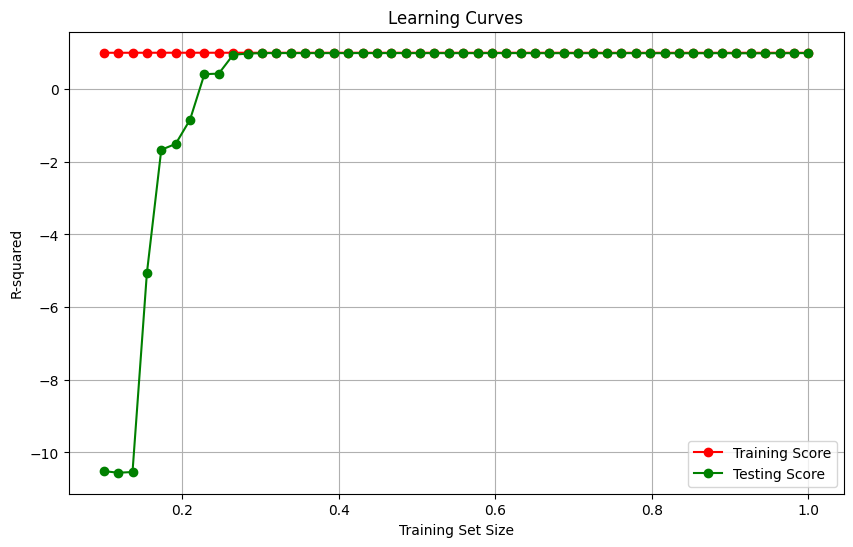

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

clf = model_1

# Create an array of train_sizes from 0.1 to 1 with 50 values
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

# Loop to calculate training and testing scores on various sizes of training data
for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)

    y_pred_test = clf.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

> **RANDOM FOREST**

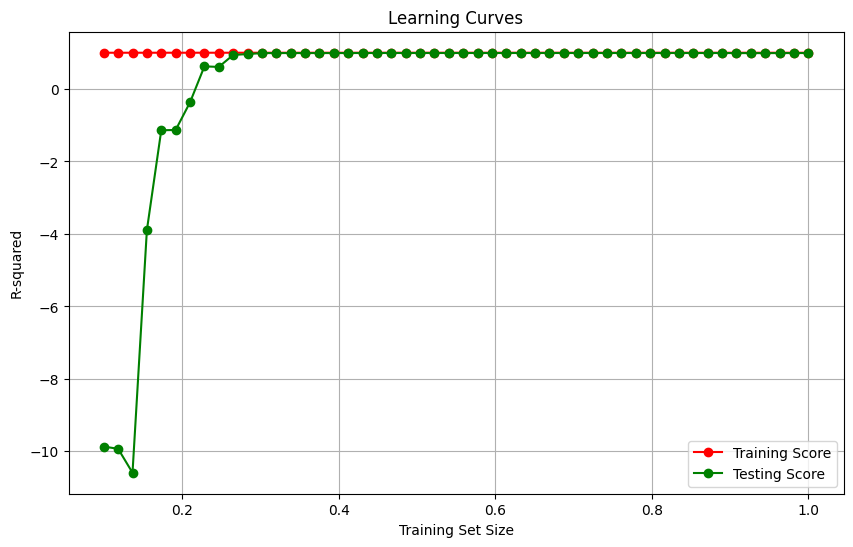

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

clf = model_2

# Create an array of train_sizes from 0.1 to 1 with 50 values
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

# Loop to calculate training and testing scores on various sizes of training data
for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)

    y_pred_test = clf.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

> **LGBM**

[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 5360, number of used features: 5
[LightGBM] [Info] Start training from score 33.198342
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 6344, number of used features: 5
[LightGBM] [Info] Start training from score 32.156231
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 7328, number of used features: 5
[LightGBM] [Info] Start training from score 31.078178
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 8313, number of used features: 5
[LightGBM] [Info] Start training from score 30.032838
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 9297, number of used features: 5
[LightGBM] [Info] Start training from score 28.996844
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 10282, number of us

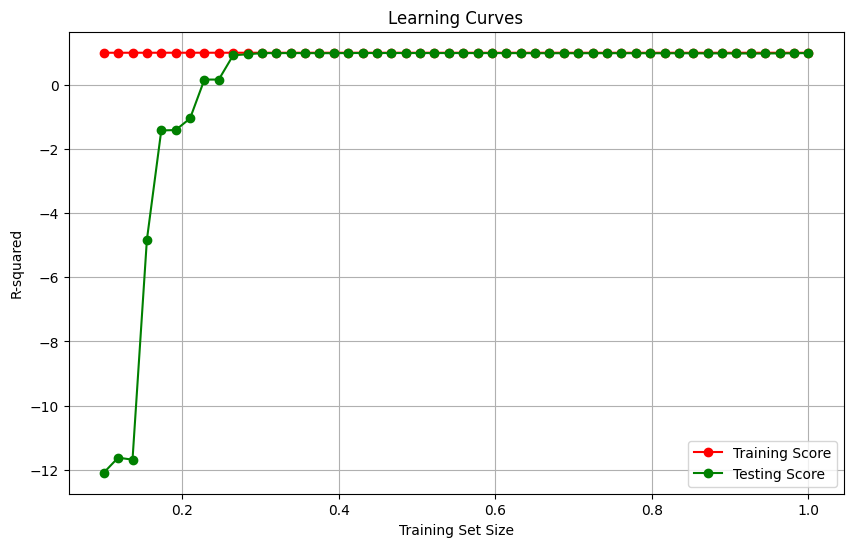

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

clf = model_3

# Create an array of train_sizes from 0.1 to 1 with 50 values
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

# cLoop to calculate training and testing scores on different sizes of training data
for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)

    y_pred_test = clf.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

> **XGBOOST**

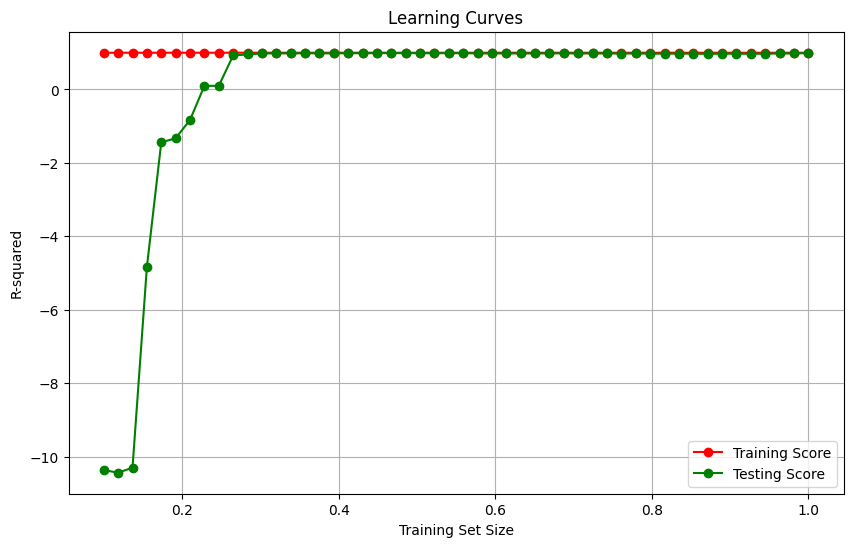

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

clf = model_4

# Create an array of train_sizes from 0.1 to 1 with 50 values
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

# Loop to calculate training and testing scores on various sizes of training data
for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)

    y_pred_test = clf.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

> **LASSO REGRESSION**

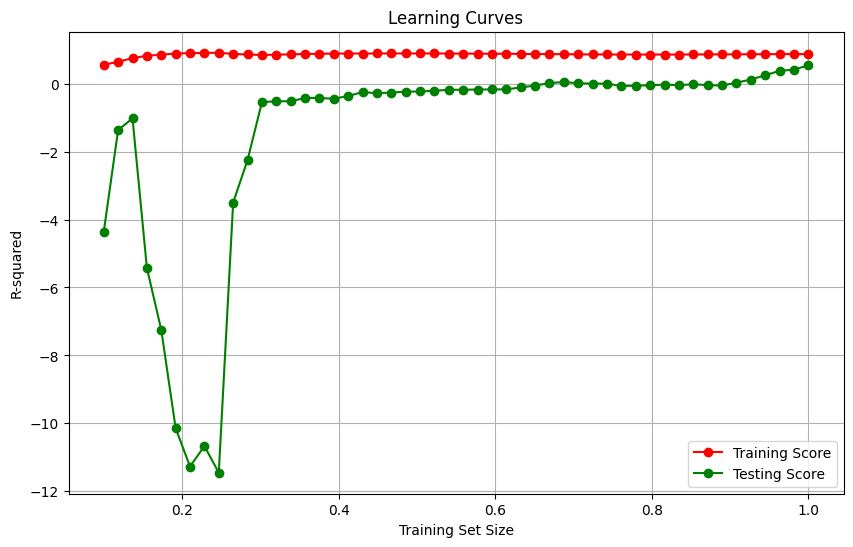

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

clf = model_5

# Create an array of train_sizes from 0.1 to 1 with 50 values
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

# Loop to calculate training and testing scores on various sizes of training data
for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)

    y_pred_test = clf.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

> **RIDGE REGRESSION**

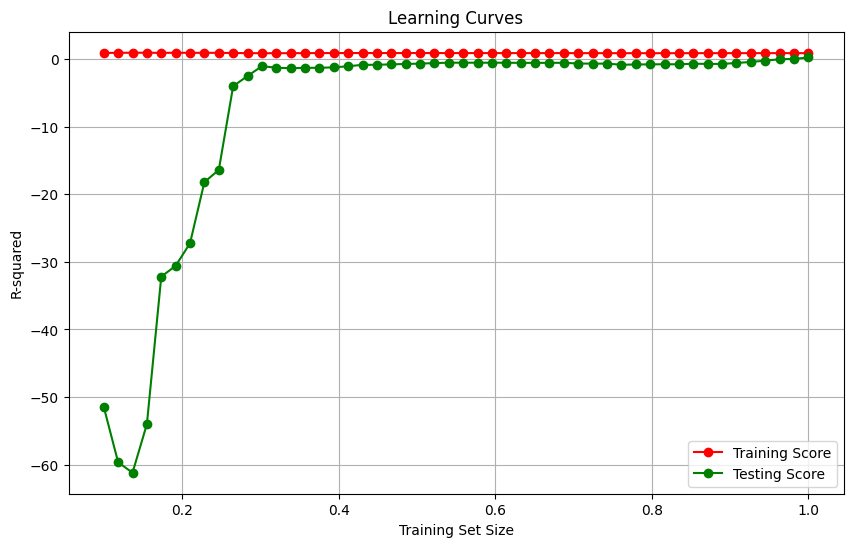

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

clf = model_6

# Create an array of train_sizes from 0.1 to 1 with 50 values
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

# Loop to calculate training and testing scores on various sizes of training data
for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    r2_train = r2_score(y_subset, y_pred_train)
    learning_curve_train.append(r2_train)

    y_pred_test = clf.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    learning_curve_test.append(r2_test)

plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

# MODEL COMPARISON

In [84]:
import pandas as pd

data_cv = {
    'Model': ['GBR', 'Random Forest', 'LGBM', 'XGBoost', 'Lasso', 'Ridge'],
    'MAE': [0.9782733094964344, 0.937005816181714, 0.960270073920894, 0.9535671255675195, 2.864271404419861, 2.7967427094958177],
    'MAPE': [14976852470768.604, 5826595796835.309, 5281278642798.781, 12168432122828.1, 189624053913475.94, 235838495909404.2],
    'MSE': [6.202176090587937, 5.638871747742224, 6.8268823118484026, 6.7238317351415, 20.0825926756253, 17.66197530577127],
    'R-Squared': [0.9046400713093796, 0.9126302973506627, 0.8963316378203745, 0.8974056327222849, 0.4975920319974265, 0.43025837088269175]
}

df_comp = pd.DataFrame(data_cv)
df_comp

,Model,MAE,MAPE,MSE,R-Squared
0,GBR,0.978273,1.497685e+13,6.202176,0.904640
1,Random Forest,0.937006,5.826596e+12,5.638872,0.912630
2,LGBM,0.960270,5.281279e+12,6.826882,0.896332
3,XGBoost,0.953567,1.216843e+13,6.723832,0.897406
4,Lasso,2.864271,1.896241e+14,20.082593,0.497592
5,Ridge,2.796743,2.358385e+14,17.661975,0.430258


In [85]:
# The model that has the best R-Squared score (the higher, the better)
df_R = df_comp.sort_values(by='R-Squared', ascending=False)
df_R

,Model,MAE,MAPE,MSE,R-Squared
1,Random Forest,0.937006,5.826596e+12,5.638872,0.912630
0,GBR,0.978273,1.497685e+13,6.202176,0.904640
3,XGBoost,0.953567,1.216843e+13,6.723832,0.897406
2,LGBM,0.960270,5.281279e+12,6.826882,0.896332
4,Lasso,2.864271,1.896241e+14,20.082593,0.497592
5,Ridge,2.796743,2.358385e+14,17.661975,0.430258


In [86]:
# The model that has the best MAE score (the smaller, the better)
df_MAE = df_comp.sort_values(by='MAE',ascending=True)
df_MAE

,Model,MAE,MAPE,MSE,R-Squared
1,Random Forest,0.937006,5.826596e+12,5.638872,0.912630
3,XGBoost,0.953567,1.216843e+13,6.723832,0.897406
2,LGBM,0.960270,5.281279e+12,6.826882,0.896332
0,GBR,0.978273,1.497685e+13,6.202176,0.904640
5,Ridge,2.796743,2.358385e+14,17.661975,0.430258
4,Lasso,2.864271,1.896241e+14,20.082593,0.497592


In [87]:
# The model that has the best MAPE score (the smaller, the better)
df_MAPE = df_comp.sort_values(by='MAPE',ascending=True)
df_MAPE

,Model,MAE,MAPE,MSE,R-Squared
2,LGBM,0.960270,5.281279e+12,6.826882,0.896332
1,Random Forest,0.937006,5.826596e+12,5.638872,0.912630
3,XGBoost,0.953567,1.216843e+13,6.723832,0.897406
0,GBR,0.978273,1.497685e+13,6.202176,0.904640
4,Lasso,2.864271,1.896241e+14,20.082593,0.497592
5,Ridge,2.796743,2.358385e+14,17.661975,0.430258


In [88]:
# The model that has the best MSE score (the smaller, the better)
df_MSE = df_comp.sort_values(by='MSE',ascending=True)
df_MSE

,Model,MAE,MAPE,MSE,R-Squared
1,Random Forest,0.937006,5.826596e+12,5.638872,0.912630
0,GBR,0.978273,1.497685e+13,6.202176,0.904640
3,XGBoost,0.953567,1.216843e+13,6.723832,0.897406
2,LGBM,0.960270,5.281279e+12,6.826882,0.896332
5,Ridge,2.796743,2.358385e+14,17.661975,0.430258
4,Lasso,2.864271,1.896241e+14,20.082593,0.497592


# **HYPERPARAMETER TUNING**

## RANDOM SEARCH

In [89]:
import numpy as np
import pandas as pd

X_train = np.array(X_train)
y_train = np.array(y_train)

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create a smaller parameter distribution for Random Search
param_dist = {
    'n_estimators': (100, 300),
    'max_depth': (5, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
    'max_features': (0.1, 1.0),
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'bootstrap': [True, False]
}
model = RandomForestRegressor()
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1, error_score='raise')
random_search.fit(X_train, y_train)

# Display best hyperparameters and best score
print("Best hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 1.0, 'max_depth': 5, 'criterion': 'friedman_mse', 'bootstrap': True}
Best score:  0.7792539021566446


# **Prediction Heat Wave with Random Forest**

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Model with the best hyperparameter 
model_use = RandomForestRegressor(
    n_estimators = 100, 
    min_samples_split = 2, 
    min_samples_leaf = 5, 
    max_features = 1.0, 
    max_depth = 5, 
    criterion = 'friedman_mse', 
    bootstrap = True
)

model_use.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=5, min_samples_leaf=5)

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Prediction using regression model
y_pred_model_2 = model_2.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_model_2)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_model_2)
print(f'Mean Squared Error (MSE): {mse}')

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_model_2)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred_model_2)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.25327728350949824
Mean Squared Error (MSE): 0.10275751885299511
Mean Absolute Percentage Error (MAPE): 15193406136369.959
R-squared (R²): 0.9918043796138755


In [126]:
temperature_prediction = model_use.predict(X_normalized)
temperature_prediction

c:\Users\SUPER USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([30.14376921, 29.97832479, 29.91066531, ...,  9.8224103 ,
        9.83077507, 10.13670023])

In [127]:
# Tambahkan hasil prediksi sebagai fitur baru ke DataFrame df_4
df_5 = df_2.copy()
df_5['Temp_Pred'] = temperature_prediction
df_5


,id,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,year,month,day,hour,minute,RH,RH_Category,AQI,Temp_Pred
date,,,,,,,,,,,,,,,,,
2016-07-01 00:00:00,0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2016,7,1,0,0,15.407155,1,1,30.143769
2016-07-01 00:15:00,1,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2016,7,1,0,15,15.537727,1,1,29.978325
2016-07-01 00:30:00,2,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2016,7,1,0,30,15.814830,1,1,29.910665
2016-07-01 00:45:00,3,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2016,7,1,0,45,18.852737,1,1,26.466708
2016-07-01 01:00:00,4,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2016,7,1,1,0,18.096185,1,1,28.090595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-01 22:45:00,64315,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000,2018,5,1,22,45,53.350777,3,1,9.960319
2018-05-01 23:00:00,64316,14.200,1.541,9.310,0.284,4.752,1.249,10.482000,2018,5,1,23,0,52.803017,3,1,10.136700
2018-05-01 23:15:00,64317,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000,2018,5,1,23,15,53.786359,3,1,9.822410


In [128]:
df_6 = df_5.copy()
df_6 = df_6.drop(columns=['id','year','month','day','hour','minute','RH_Category','AQI'])
df_6

,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,RH,Temp_Pred
date,,,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,15.407155,30.143769
2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,15.537727,29.978325
2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,15.814830,29.910665
2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,18.852737,26.466708
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,18.096185,28.090595
...,...,...,...,...,...,...,...,...,...
2018-05-01 22:45:00,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000,53.350777,9.960319
2018-05-01 23:00:00,14.200,1.541,9.310,0.284,4.752,1.249,10.482000,52.803017,10.136700
2018-05-01 23:15:00,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000,53.786359,9.822410


In [133]:
# Convert data per 15 minutes to data per day
df_daily = df_6.copy()
df_daily = df_6.resample('D').mean()

# Calculating daily maximum and minimum temperatures
daily_max_temp = df_6.resample('D')['Temperature'].max()
daily_min_temp = df_6.resample('D')['Temperature'].min()

# Calculating the average daily maximum temperature 
df_daily['Avg_daily_max_temp'] = (daily_max_temp + daily_min_temp) / 2

# Heat_wave column based on WMO definition
def is_heat_wave(temps, threshold):
    return all(temp > threshold for temp in temps)

average_max_temp = daily_max_temp.mean()
threshold_temp = average_max_temp + 5

heat_wave = [0] * len(df_daily)
for i in range(len(df_daily) - 4):
    if is_heat_wave(df_daily['Temp_Pred'][i:i+5], threshold_temp):
        for j in range(i, i+5):
            heat_wave[j] = 1

df_daily['Heat_wave'] = heat_wave
df_daily

,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,RH,Temp_Pred,Avg_daily_max_temp,Heat_wave
date,,,,,,,,,,,
2016-07-01,5.349938,2.630146,1.992885,0.914625,3.327875,1.509844,21.025677,28.003302,20.149636,23.461000,0
2016-07-02,8.161677,4.130490,5.246219,2.018031,2.878094,1.648615,22.053792,26.377194,20.950449,23.636499,0
2016-07-03,10.562635,5.017198,7.158052,2.554063,3.309896,1.883635,26.355917,21.060385,25.268857,25.501000,1
2016-07-04,10.540958,5.354812,7.010833,2.787604,3.360313,1.918594,27.369385,19.704043,26.288651,27.188999,1
2016-07-05,11.211573,5.347125,7.584531,2.661406,3.514521,2.018490,30.139260,16.707299,29.189497,29.194000,1
...,...,...,...,...,...,...,...,...,...,...,...
2018-04-27,4.696250,2.566781,1.242979,0.676573,3.410073,1.279875,11.439469,49.935771,10.901156,11.642500,0
2018-04-28,4.737448,1.613688,0.919458,-0.135854,3.691885,1.250438,11.125760,50.861846,10.654514,11.677500,0
2018-04-29,6.419615,1.178354,2.689177,-0.435292,3.644281,1.197073,12.241115,46.886100,11.770692,12.135000,0


In [134]:
# Create RH category column
def categorize_rh(rh):
    if rh < 30:
        return 1 # Very Dry
    elif 30 <= rh < 50:
        return 2 # Dry
    elif 50 <= rh < 70:
        return 3 # Comportable
    elif 70 <= rh < 90:
        return 4 # Humid
    else:
        return 5 # Very Humid

df_daily['RH_Category'] = df_daily['RH'].apply(categorize_rh)

# Calculating AQI (Air Quality Index) based on PM2.5 concentration
def calculate_aqi(pm25):
    if pm25 <= 12:
        return 1 # Good
    elif 12 < pm25 <= 35.4:
        return 2 # Medium
    elif 35.4 < pm25 <= 55.4:
        return 3 # Unhealthy for Certain People
    elif 55.4 < pm25 <= 150.4:
        return 4 # Unhealthy
    elif 150.4 < pm25 <= 250.4:
        return 5 # Very Unhealthy
    else:
        return 6 # Danger

# Apply the function to calculate AQI
df_daily['AQI'] = df_daily['pm2.5'].apply(calculate_aqi)
df_daily

,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,RH,Temp_Pred,Avg_daily_max_temp,Heat_wave,RH_Category,AQI
date,,,,,,,,,,,,,
2016-07-01,5.349938,2.630146,1.992885,0.914625,3.327875,1.509844,21.025677,28.003302,20.149636,23.461000,0,1,1
2016-07-02,8.161677,4.130490,5.246219,2.018031,2.878094,1.648615,22.053792,26.377194,20.950449,23.636499,0,1,1
2016-07-03,10.562635,5.017198,7.158052,2.554063,3.309896,1.883635,26.355917,21.060385,25.268857,25.501000,1,1,1
2016-07-04,10.540958,5.354812,7.010833,2.787604,3.360313,1.918594,27.369385,19.704043,26.288651,27.188999,1,1,1
2016-07-05,11.211573,5.347125,7.584531,2.661406,3.514521,2.018490,30.139260,16.707299,29.189497,29.194000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-27,4.696250,2.566781,1.242979,0.676573,3.410073,1.279875,11.439469,49.935771,10.901156,11.642500,0,2,1
2018-04-28,4.737448,1.613688,0.919458,-0.135854,3.691885,1.250438,11.125760,50.861846,10.654514,11.677500,0,3,1
2018-04-29,6.419615,1.178354,2.689177,-0.435292,3.644281,1.197073,12.241115,46.886100,11.770692,12.135000,0,2,1


In [149]:
df_daily.to_csv('DF_Result.csv')

**CONCLUSION**

From the steps carried out, the best model and hyperparameters were obtained.
1. Best model: Random Forest
2. Best hyperparameters : {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 1.0, 'max_depth': 5, 'criterion': 'friedman_mse', 'bootstrap': True}

After running the model with these hyperparameters, the temperature prediction results were obtained with the name 'Temp_Pred', which was entered into the df_daily dataset. After obtaining the 'Temp_Pred' column, 'threshold_temp' is found by summing the results of the average daily maximum temperature ('average_max_temp') by 5. After that, the 'Heat_wave' column is obtained by finding the value of 'Temp_Pred' that has a value greater than 'threshold_temp' 5 times in a row and is labelled as True/1 and for values that do not meet the criteria, are labelled as False/0.